# Search: Solving a Maze Using a Goal-based Agent

Student Name: Rick Lattin

I have used the following AI tools: Github Copilot

I understand that my submission needs to be my own work: RLL

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible.

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [13]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`.

In [14]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

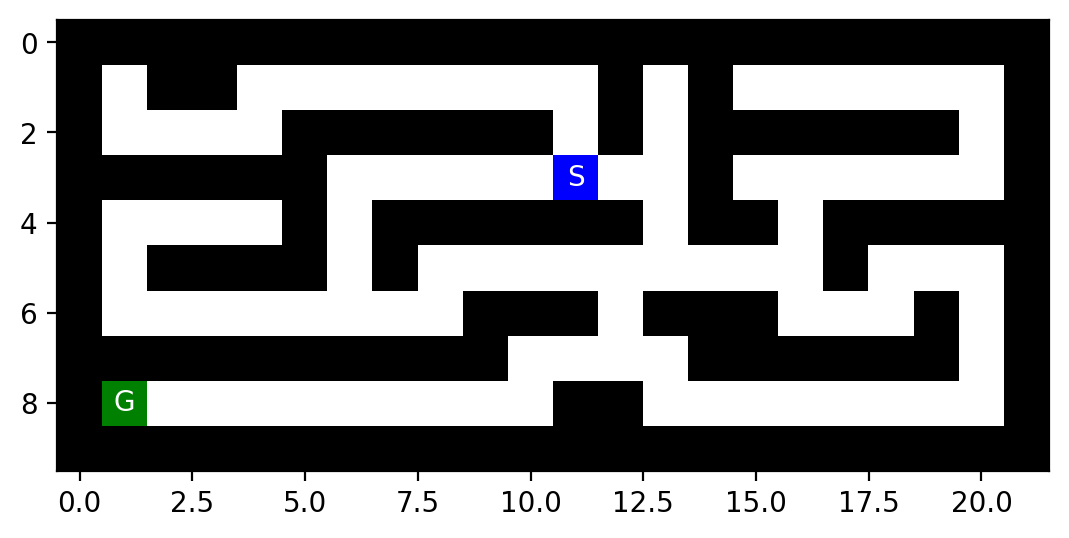

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [16]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [17]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /Users/ricklattin/Documents/SMU Year 4 Sem 1/Artificial Intelligence/AI_Assignment_3/maze_he

## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [18]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)

In [19]:
# finds location of the starting node and the goal node of maze
def find_start_end(maze):
    #iterate through the maze to find start
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if maze[i][j] == "S":
                start = (i,j)
    for x in range(len(maze)):
        for y in range(len(maze[i])):
            if maze[x][y] == "G":
                end = (x,y)
    return((start, end))

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../HOWTOs/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the
    - [small maze](small_maze.txt),
    - [medium maze](medium_maze.txt),
    - [large maze](large_maze.txt),
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate.

*Note:* You can swich the next block from code to Markdown and use formating.

#### #Your answer goes here

##### the maze contains two spaces representing the initial and goal states. The initial state is denoted with an "S", and the goal state is denoted with a "G". The Initial state of the maze is the maze as seen in the text file, with none of the empty spaces filled in to represent a path, and the "S" being the starting point of a path that would solve the maze. The Goal state of the maze would be the same maze text file as before, but with a path filling in empty spaces from the "S" to the "G", effectivley drwaing a path through the maze. As the maze is represnted by a 2D array, the only possible actions are to move from one open space in the moze to another. The open spaces are squares in the maze that are not filled an "X" already. The "X" spaces represent the walls of the maze, and as such are unable to be moved to from open spaces in the maze. From any given open space in the maze, the only possible action, given that there are no walls interrupting this, is NORTH, SOUTH, EAST or WEST, representing moving up, down, right or left in the maze. The tranistion model would consist of adding a new node to the incomplete path to end of the maze, adding the node at one of the frontier points that has already been explored in the maze, and then adding any possible moves that could be taken from the new node to the fronteir, updating the list of further possible moves and removing the one that was taken to add the new node.

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

### Your answer goes here

##### The state space size n for the problem would be the number of nodes put in the search tree and could be determined by looking at the number of nodes reached through the "reached" list, if the algorith implements one, or through looking at the path size for nodes that do not. The state space size would have to be less than or eqaul to the number of spaces in the maze subtracted by the number of walls and the start and end spaces. The d depth of the optimal solution be the smallest number of nodes necessary to reach the goal state from the initial state, and could be found by getting the path size of any algorithm that gives an optimal solution, otherwise you could only get an estimate of the algorithm. The depth of the optimal solution must be less than or equal to the given path from the goal to the initial state, assuming you cannot find and confirm what the shortest path in the maze is. The maximum depth of the tree m  is the farthest the search algorith ever expanded down a given path, and could be found by getting the maximu cost of any node that is explored and added to the reach function or the final path. The maximum depth of the tree must be greater than or equal to the cost of the final node in the final path returned by the search algorithm. Finally, the maximum branching factor b is the maximum numbur of the possible paths that the tree has saved at any given time, and can be found by found by getting the maximu length of the fronteir list thgrougout the running of the algorithm. This vaklue should end up being less than or equal to the number of spaces in the maze subtracted by the number of walls and the initial and goal spaces, but will most likely be much less than this.


## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore.
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [20]:
# Your code goes here
possible_actions = ["NORTH", "EAST", "WEST", "SOUTH"]

# checks if given action is possible from node position
def try_action(maze, node, action):
    if action == "NORTH" and maze[node.pos[0] - 1][node.pos[1]] != "X":
        new_pos = (node.pos[0] - 1, node.pos[1])
        return new_pos
    elif action == "SOUTH" and maze[node.pos[0] + 1][node.pos[1]] != "X":
        new_pos = (node.pos[0] + 1, node.pos[1])
        return new_pos
    elif action == "EAST" and maze[node.pos[0]][node.pos[1] + 1] != "X":
        new_pos = (node.pos[0], node.pos[1] + 1)
        return new_pos
    elif action == "WEST" and maze[node.pos[0]][node.pos[1] - 1] != "X":
        new_pos = (node.pos[0], node.pos[1] - 1)
        return new_pos
    return node.pos
    

# expands frontier by checking possible actions
def expand(maze, node, reached):
    fronteir_node_set = []
    node_state = node.pos
    
    # checks possible actions and adds them to frontier
    for action in possible_actions:
        node_state_updated = try_action(maze, node, action)
        if node_state_updated not in reached:
            if node_state_updated != node_state:
                cost = node.cost + 1
            else:
                cost = node.cost
            fronteir_node_set.append(Node(node_state_updated, node, action, cost))
    return fronteir_node_set

# Breadth First Search algorithm
def BFS(maze, limit = 1000000, hueristic = None):
    # finds start and end points of maze
    maze_points = find_start_end(maze)
    start = maze_points[0]
    end = maze_points[1]

    # values needed for tables at the end
    path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = 0, 0, 0, 0, 0

    # creates root node and frontier
    cur_node = Node(start, None, None, 0)
    reached = [start]
    if cur_node.pos == end:
        return(cur_node, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size)
    frontier = [cur_node]
    

    # continues to expand frontier until end node is found
    while frontier:
        max_frontier_size = max(max_frontier_size, len(frontier))
        cur_node = frontier.pop(0)

        max_tree_depth = max(max_tree_depth, cur_node.cost)
        max_nodes_in_memory = max(max_nodes_in_memory, len(reached))
        cur_node_children = expand(maze, cur_node, reached)

        for child in cur_node_children:
            child_state = child.pos
            if child_state == end:
                path_cost = child.cost
                num_nodes_expanded = len(reached)
                return(child, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size)
            if child_state not in reached:
                reached.append(child_state)
                frontier.append(child)

    print("BFS failed")
    return None

In [21]:
import maze_helper as mh
import copy

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

reached = []
path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = 0, 0, 0, 0, 0

# runs every possible maze with a given search algorithm
def test_mazes(search_function, limit = 1000000, hueristic = None):
    # loads all mazes:
    # small maze
    with open("small_maze.txt", "r") as f:
        maze_str = f.read()
    maze_small = mh.parse_maze(maze_str)
    my_maze_small = copy.deepcopy(maze_small)

    # medium maze
    with open("medium_maze.txt", "r") as f:
        maze_str = f.read()
    maze_medium = mh.parse_maze(maze_str)
    my_maze_medium = copy.deepcopy(maze_medium)

    # large maze
    with open("large_maze.txt", "r") as f:
        maze_str = f.read()
    maze_large = mh.parse_maze(maze_str)
    my_maze_large = copy.deepcopy(maze_large)
    
    # empty maze
    with open("empty_maze.txt", "r") as f:
        maze_str = f.read()
    maze_empty = mh.parse_maze(maze_str)
    my_maze_empty = copy.deepcopy(maze_empty)

    # empty maze 2
    with open("empty_2_maze.txt", "r") as f:
        maze_str = f.read()
    maze_empty_2 = mh.parse_maze(maze_str)
    my_maze_empty_2 = copy.deepcopy(maze_empty_2) 

    # open maze
    with open("open_maze.txt", "r") as f:
        maze_str = f.read()
    maze_open = mh.parse_maze(maze_str)
    my_maze_open = copy.deepcopy(maze_open)

    # loops maze
    with open("loops_maze.txt", "r") as f:
        maze_str = f.read()
    maze_loops = mh.parse_maze(maze_str)
    my_maze_loops = copy.deepcopy(maze_loops)

    # wall maze
    with open("wall_maze.txt", "r") as f:
        maze_str = f.read()
    maze_wall = mh.parse_maze(maze_str)
    my_maze_wall = copy.deepcopy(maze_wall)

    # implement and print results for small maze
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = search_function(my_maze_small, limit, hueristic)
    print(Path_End)
    for x in Path_End.get_path_from_root():
        if x.action != None and my_maze_small[x.pos[0]][x.pos[1]] != "G" and my_maze_small[x.pos[0]][x.pos[1]] != "S" and my_maze_small[x.pos[0]][x.pos[1]] != "X":
            my_maze_small[x.pos[0]][x.pos[1]] = "P"
    for y in reached:
        if my_maze_small[y[0], y[1]] != "S" and my_maze_small[y[0], y[1]] != "G" and my_maze_small[y[0], y[1]] != "X" and my_maze_small[y[0], y[1]] != "P":
            my_maze_small[y[0]][y[1]] = "."
    mh.show_maze(my_maze_small)

    print("path_cost:", path_cost, "num_nodes_expanded:", num_nodes_expanded, "max_tree_depth:", max_tree_depth, "max_nodes_in_memory:", max_nodes_in_memory, "max_frontier_size:", max_frontier_size, "\n")

    # implement and print results for medium maze
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = search_function(my_maze_medium, limit, hueristic)
    print(Path_End)
    for x in Path_End.get_path_from_root():
        if x.action != None and my_maze_medium[x.pos[0]][x.pos[1]] != "G" and my_maze_medium[x.pos[0]][x.pos[1]] != "S" and my_maze_medium[x.pos[0]][x.pos[1]] != "X":
            my_maze_medium[x.pos[0]][x.pos[1]] = "P"
        for y in reached:
            if my_maze_medium[y[0], y[1]] != "S" and my_maze_medium[y[0], y[1]] != "G" and my_maze_medium[y[0], y[1]] != "X" and my_maze_medium[y[0], y[1]] != "P":
                my_maze_medium[y[0]][y[1]] = "."
    mh.show_maze(my_maze_medium)

    print("path_cost:", path_cost, "num_nodes_expanded:", num_nodes_expanded, "max_tree_depth:", max_tree_depth, "max_nodes_in_memory:", max_nodes_in_memory, "max_frontier_size:", max_frontier_size, "\n")

    # implement and print results for large maze
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = search_function(my_maze_large, limit, hueristic)
    print(Path_End)
    for x in Path_End.get_path_from_root():
        if x.action != None and my_maze_large[x.pos[0]][x.pos[1]] != "G" and my_maze_large[x.pos[0]][x.pos[1]] != "S" and my_maze_large[x.pos[0]][x.pos[1]] != "X":
            my_maze_large[x.pos[0]][x.pos[1]] = "P"
        for y in reached:
            if my_maze_large[y[0], y[1]] != "S" and my_maze_large[y[0], y[1]] != "G" and my_maze_large[y[0], y[1]] != "X" and my_maze_large[y[0], y[1]] != "P":
                my_maze_large[y[0]][y[1]] = "."
    mh.show_maze(my_maze_large)

    print("path_cost:", path_cost, "num_nodes_expanded:", num_nodes_expanded, "max_tree_depth:", max_tree_depth, "max_nodes_in_memory:", max_nodes_in_memory, "max_frontier_size:", max_frontier_size, "\n")

    # implement and print results for empty maze
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = search_function(my_maze_empty, limit, hueristic)
    print("Path_End:", Path_End)
    for x in Path_End.get_path_from_root():
        if x.action != None and my_maze_empty[x.pos[0]][x.pos[1]] != "G" and my_maze_empty[x.pos[0]][x.pos[1]] != "S" and my_maze_empty[x.pos[0]][x.pos[1]] != "X":
            my_maze_empty[x.pos[0]][x.pos[1]] = "P"
        for y in reached:
            if my_maze_empty[y[0], y[1]] != "S" and my_maze_empty[y[0], y[1]] != "G" and my_maze_empty[y[0], y[1]] != "X" and my_maze_empty[y[0], y[1]] != "P":
                my_maze_empty[y[0]][y[1]] = "."
    mh.show_maze(my_maze_empty)

    print("path_cost:", path_cost, "num_nodes_expanded:", num_nodes_expanded, "max_tree_depth:", max_tree_depth, "max_nodes_in_memory:", max_nodes_in_memory, "max_frontier_size:", max_frontier_size, "\n")

    # implement and print results for empty 2 maze
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = search_function(my_maze_empty_2, limit, hueristic)
    print("Path_End:", Path_End)
    for x in Path_End.get_path_from_root():
        if x.action != None and my_maze_empty_2[x.pos[0]][x.pos[1]] != "G" and my_maze_empty_2[x.pos[0]][x.pos[1]] != "S" and my_maze_empty_2[x.pos[0]][x.pos[1]] != "X":
            my_maze_empty_2[x.pos[0]][x.pos[1]] = "P"
        for y in reached:
            if my_maze_empty_2[y[0], y[1]] != "S" and my_maze_empty_2[y[0], y[1]] != "G" and my_maze_empty_2[y[0], y[1]] != "X" and my_maze_empty_2[y[0], y[1]] != "P":
                my_maze_empty_2[y[0]][y[1]] = "."
    mh.show_maze(my_maze_empty_2)

    print("path_cost:", path_cost, "num_nodes_expanded:", num_nodes_expanded, "max_tree_depth:", max_tree_depth, "max_nodes_in_memory:", max_nodes_in_memory, "max_frontier_size:", max_frontier_size, "\n")


    # implement and print results for open maze
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = search_function(my_maze_open, limit, hueristic)
    print("Path_End:", Path_End)
    for x in Path_End.get_path_from_root():
        if x.action != None and my_maze_open[x.pos[0]][x.pos[1]] != "G" and my_maze_open[x.pos[0]][x.pos[1]] != "S" and my_maze_open[x.pos[0]][x.pos[1]] != "X":
            my_maze_open[x.pos[0]][x.pos[1]] = "P"
        for y in reached:
            if my_maze_open[y[0], y[1]] != "S" and my_maze_open[y[0], y[1]] != "G" and my_maze_open[y[0], y[1]] != "X" and my_maze_open[y[0], y[1]] != "P":
                my_maze_open[y[0]][y[1]] = "."
    mh.show_maze(my_maze_open)

    print("path_cost:", path_cost, "num_nodes_expanded:", num_nodes_expanded, "max_tree_depth:", max_tree_depth, "max_nodes_in_memory:", max_nodes_in_memory, "max_frontier_size:", max_frontier_size, "\n")

    # implement and print results for loops maze
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = search_function(my_maze_loops, limit, hueristic)
    print("Path_End:", Path_End)
    for x in Path_End.get_path_from_root():
        if x.action != None and my_maze_loops[x.pos[0]][x.pos[1]] != "G" and my_maze_loops[x.pos[0]][x.pos[1]] != "S" and my_maze_loops[x.pos[0]][x.pos[1]] != "X":
            my_maze_loops[x.pos[0]][x.pos[1]] = "P"
        for y in reached:
            if my_maze_loops[y[0], y[1]] != "S" and my_maze_loops[y[0], y[1]] != "G" and my_maze_loops[y[0], y[1]] != "X" and my_maze_loops[y[0], y[1]] != "P":
                my_maze_loops[y[0]][y[1]] = "."
    mh.show_maze(my_maze_loops)

    print("path_cost:", path_cost, "num_nodes_expanded:", num_nodes_expanded, "max_tree_depth:", max_tree_depth, "max_nodes_in_memory:", max_nodes_in_memory, "max_frontier_size:", max_frontier_size, "\n")

    # implement and print results for wall maze
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = search_function(my_maze_wall, limit, hueristic)
    print("Path_End:", Path_End)
    for x in Path_End.get_path_from_root():
        if x.action != None and my_maze_wall[x.pos[0]][x.pos[1]] != "G" and my_maze_wall[x.pos[0]][x.pos[1]] != "S" and my_maze_wall[x.pos[0]][x.pos[1]] != "X":
            my_maze_wall[x.pos[0]][x.pos[1]] = "P"
        for y in reached:
            if my_maze_wall[y[0], y[1]] != "S" and my_maze_wall[y[0], y[1]] != "G" and my_maze_wall[y[0], y[1]] != "X" and my_maze_wall[y[0], y[1]] != "P":
                my_maze_wall[y[0]][y[1]] = "."
    mh.show_maze(my_maze_wall)

    print("path_cost:", path_cost, "num_nodes_expanded:", num_nodes_expanded, "max_tree_depth:", max_tree_depth, "max_nodes_in_memory:", max_nodes_in_memory, "max_frontier_size:", max_frontier_size, "\n")
    

Node - pos = (8, 1); action = WEST; cost = 19


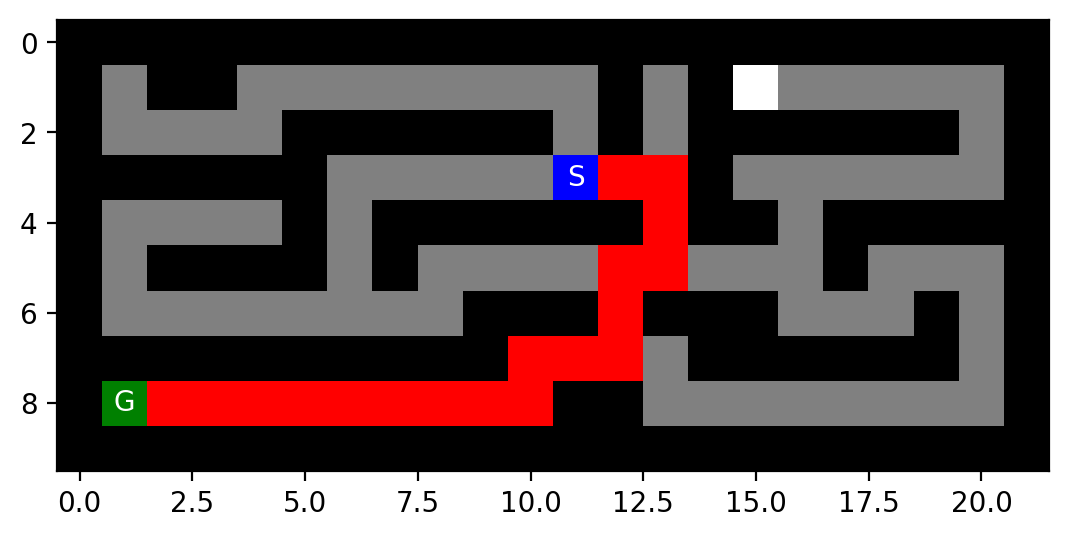

path_cost: 19 num_nodes_expanded: 92 max_tree_depth: 18 max_nodes_in_memory: 92 max_frontier_size: 9 

Node - pos = (16, 1); action = WEST; cost = 68


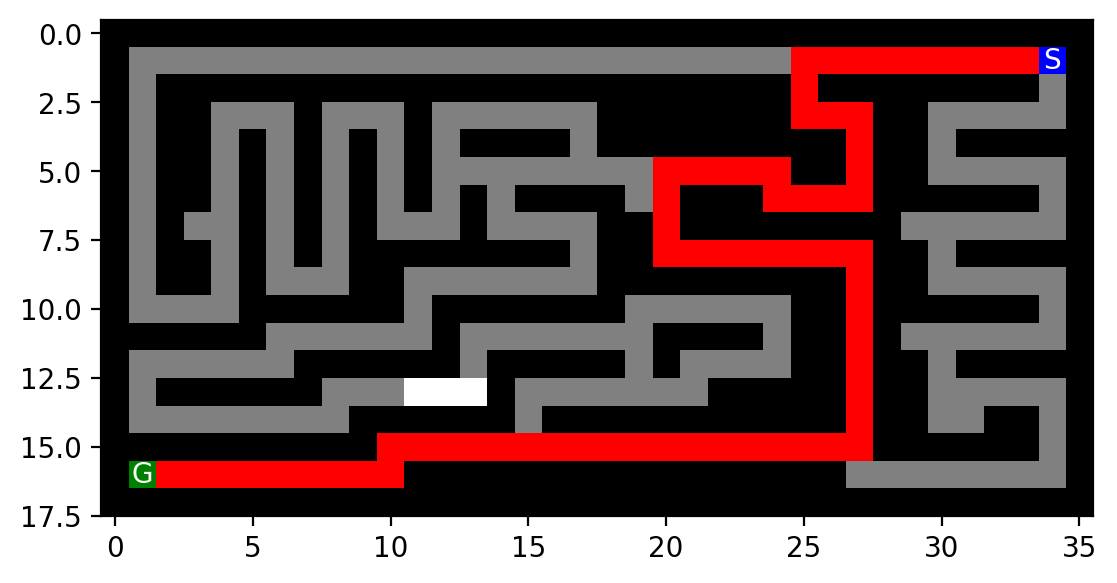

path_cost: 68 num_nodes_expanded: 270 max_tree_depth: 67 max_nodes_in_memory: 270 max_frontier_size: 8 

Node - pos = (35, 1); action = SOUTH; cost = 210


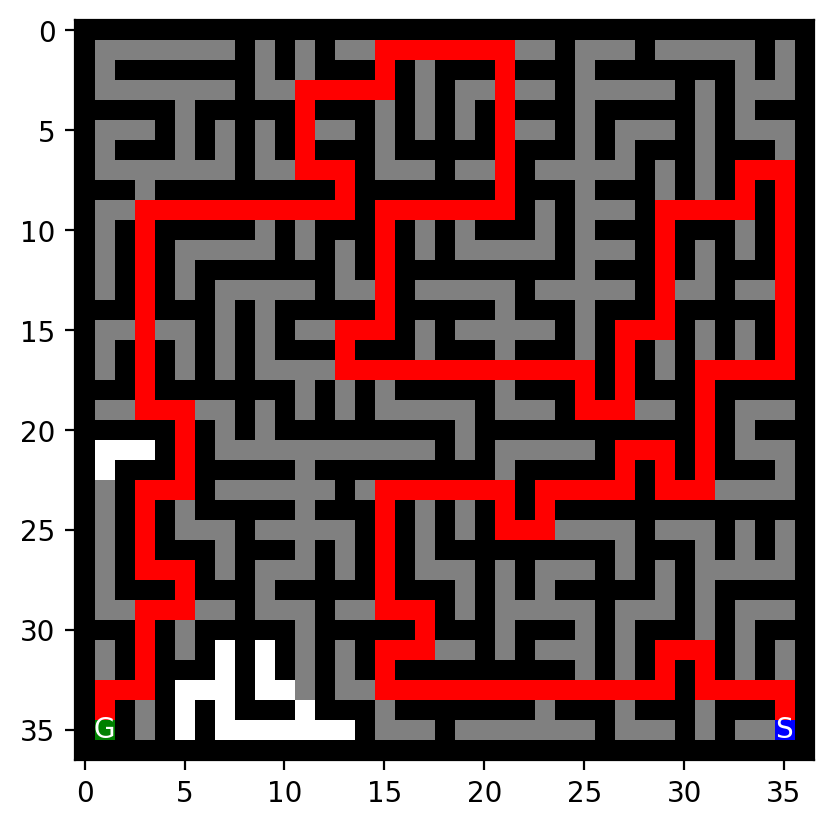

path_cost: 210 num_nodes_expanded: 622 max_tree_depth: 209 max_nodes_in_memory: 622 max_frontier_size: 9 

Path_End: Node - pos = (2, 9); action = EAST; cost = 14


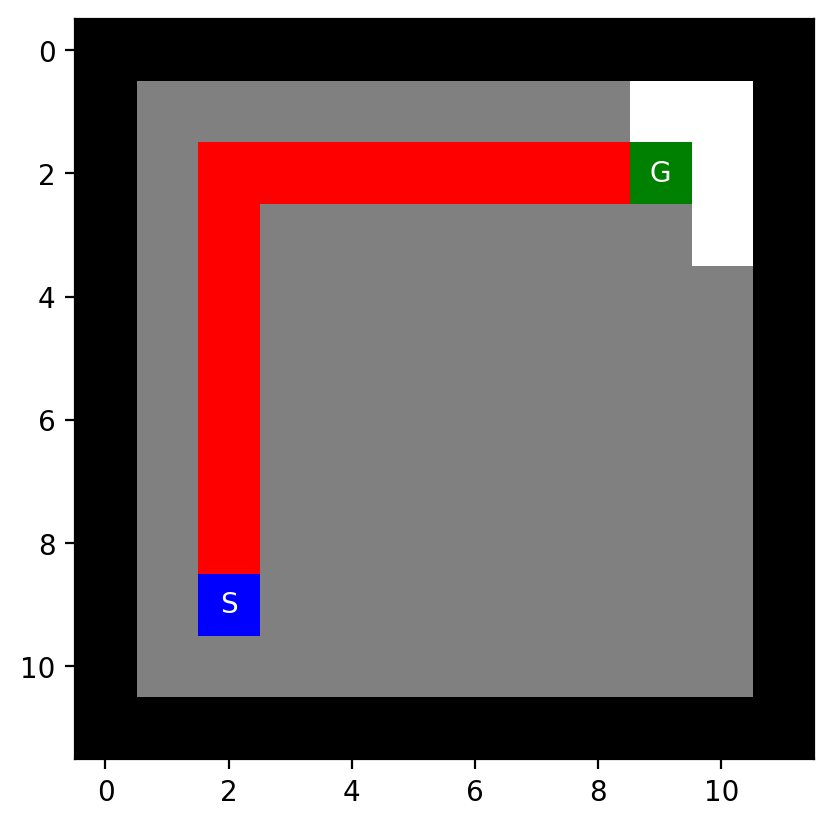

path_cost: 14 num_nodes_expanded: 95 max_tree_depth: 13 max_nodes_in_memory: 95 max_frontier_size: 12 

Path_End: Node - pos = (9, 2); action = SOUTH; cost = 14


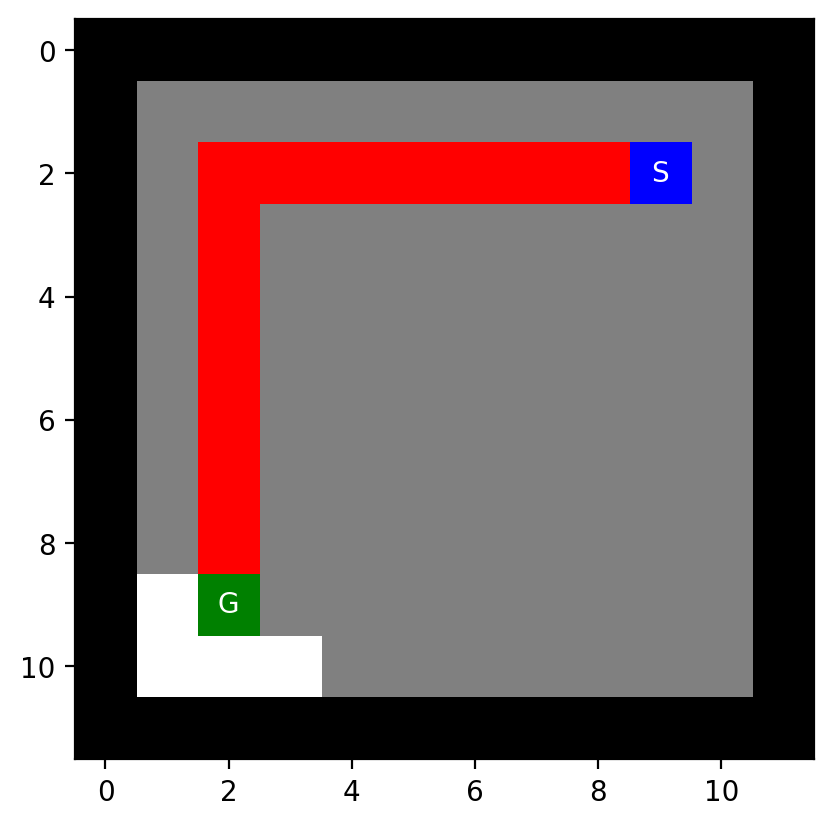

path_cost: 14 num_nodes_expanded: 95 max_tree_depth: 13 max_nodes_in_memory: 95 max_frontier_size: 11 

Path_End: Node - pos = (21, 1); action = SOUTH; cost = 54


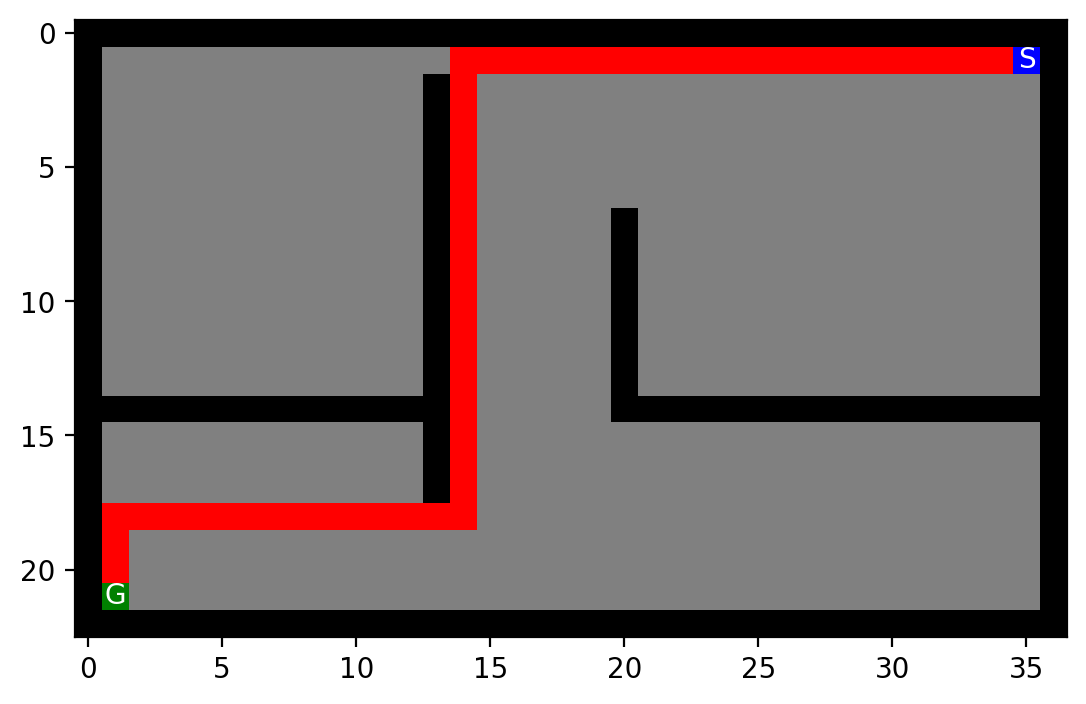

path_cost: 54 num_nodes_expanded: 683 max_tree_depth: 53 max_nodes_in_memory: 683 max_frontier_size: 23 

Path_End: Node - pos = (1, 1); action = WEST; cost = 23


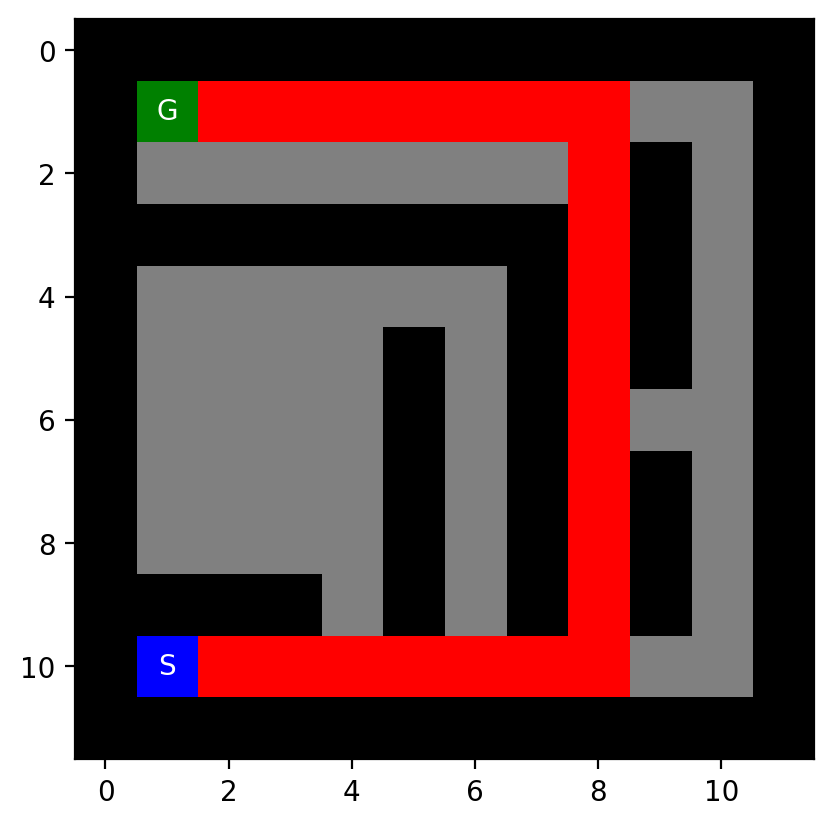

path_cost: 23 num_nodes_expanded: 71 max_tree_depth: 22 max_nodes_in_memory: 71 max_frontier_size: 8 

Path_End: Node - pos = (2, 9); action = EAST; cost = 14


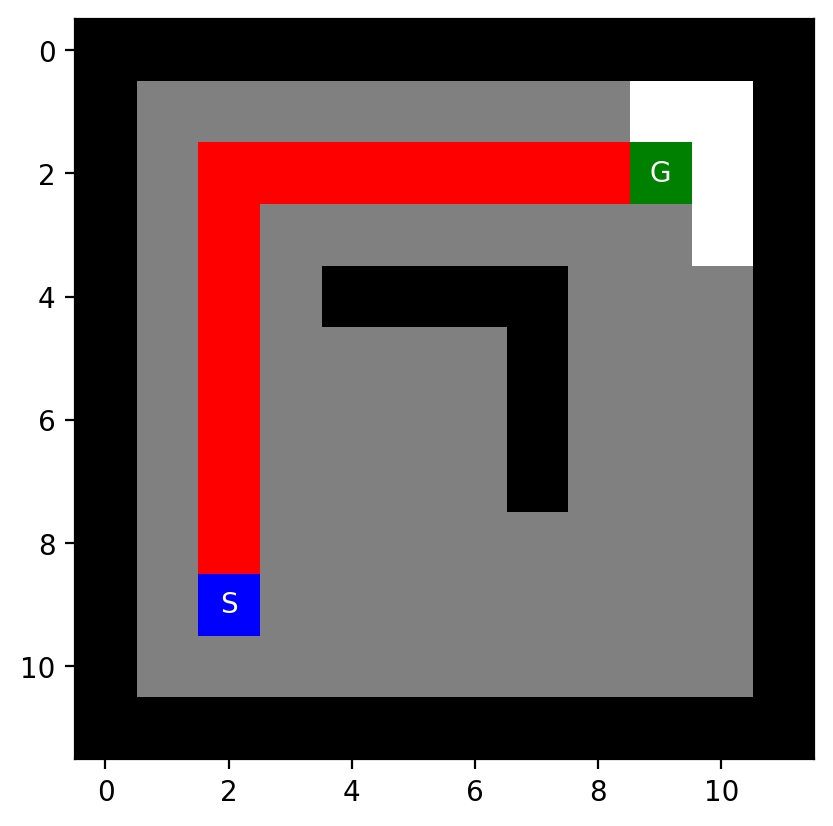

path_cost: 14 num_nodes_expanded: 88 max_tree_depth: 13 max_nodes_in_memory: 88 max_frontier_size: 11 



In [22]:
# testing BFS Mazes
test_mazes(BFS)


In [23]:
def cycle_check(node):
    for x in node.get_path_from_root()[:-1]:
        if x.pos == node.pos:
            return True #cycle has been found
    return False #no cycle found

# Depth First Search algorithm
def DFS(maze, limit = 1000000, hueristic = None):
    reached_placeholder = []
    # finds start and end points of maze
    maze_points = find_start_end(maze)
    start = maze_points[0]
    end = maze_points[1]

    path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = 0, 0, 0, 0, 0

    # creates root node and frontier
    cur_node = Node(start, None, None, 0)
    frontier = [cur_node]
    result = "fail" # result is set to failure here

    # continues to expand frontier until end node is found
    while frontier:
        max_frontier_size = max(max_frontier_size, len(frontier)) #variable for anaylsis
        cur_node = frontier.pop()
        
        if cur_node.pos == end:
            path_cost = cur_node.cost #variable for anaylsis
            num_nodes_expanded = len(frontier) #variable for anaylsis
            return cur_node, reached_placeholder, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
        if cur_node.cost > limit:
            result = "cutoff"

        if not cycle_check(cur_node):
            max_tree_depth = max(max_tree_depth, cur_node.cost) #variable for anaylsis
            max_nodes_in_memory = max(max_nodes_in_memory, len(frontier)) #variable for anaylsis
            cur_node_children = expand(maze, cur_node, cur_node.get_path_from_root())
            for child in cur_node_children:
                reached_placeholder.append(child.pos)
                frontier.append(child)
    print("Failed")
    return result, reached_placeholder, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size

Node - pos = (8, 1); action = WEST; cost = 29


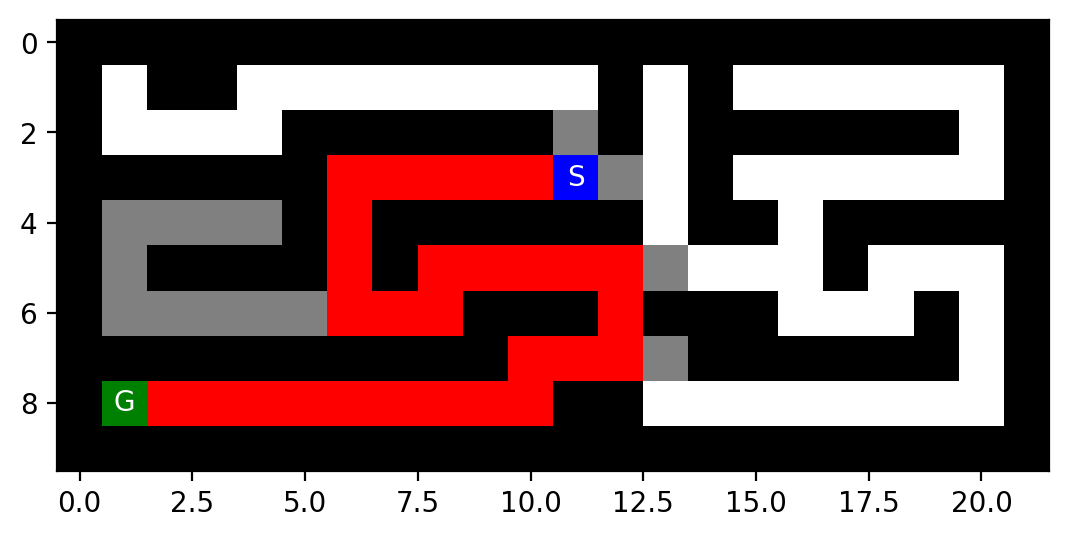

path_cost: 29 num_nodes_expanded: 56 max_tree_depth: 28 max_nodes_in_memory: 54 max_frontier_size: 58 

Node - pos = (16, 1); action = WEST; cost = 76


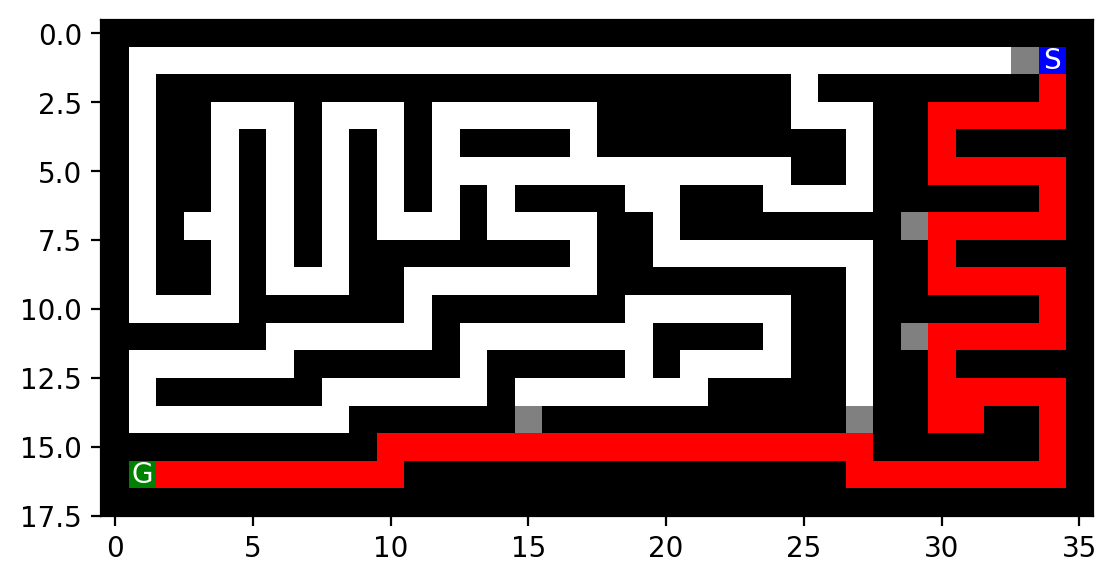

path_cost: 76 num_nodes_expanded: 153 max_tree_depth: 75 max_nodes_in_memory: 151 max_frontier_size: 155 

Node - pos = (35, 1); action = SOUTH; cost = 210


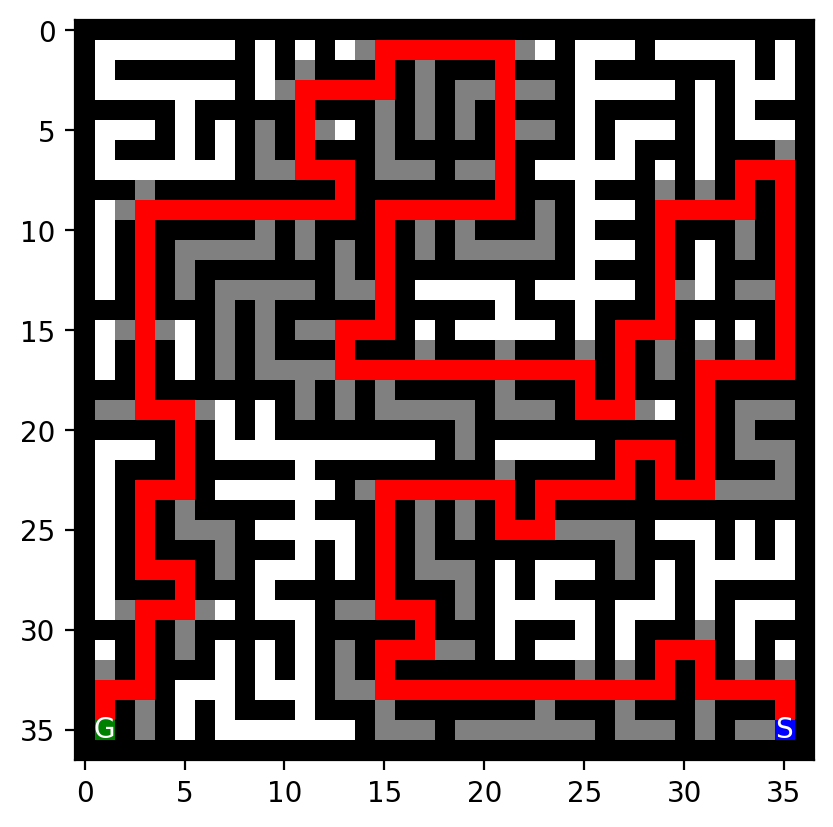

path_cost: 210 num_nodes_expanded: 332 max_tree_depth: 209 max_nodes_in_memory: 329 max_frontier_size: 333 

Path_End: Node - pos = (2, 9); action = EAST; cost = 88


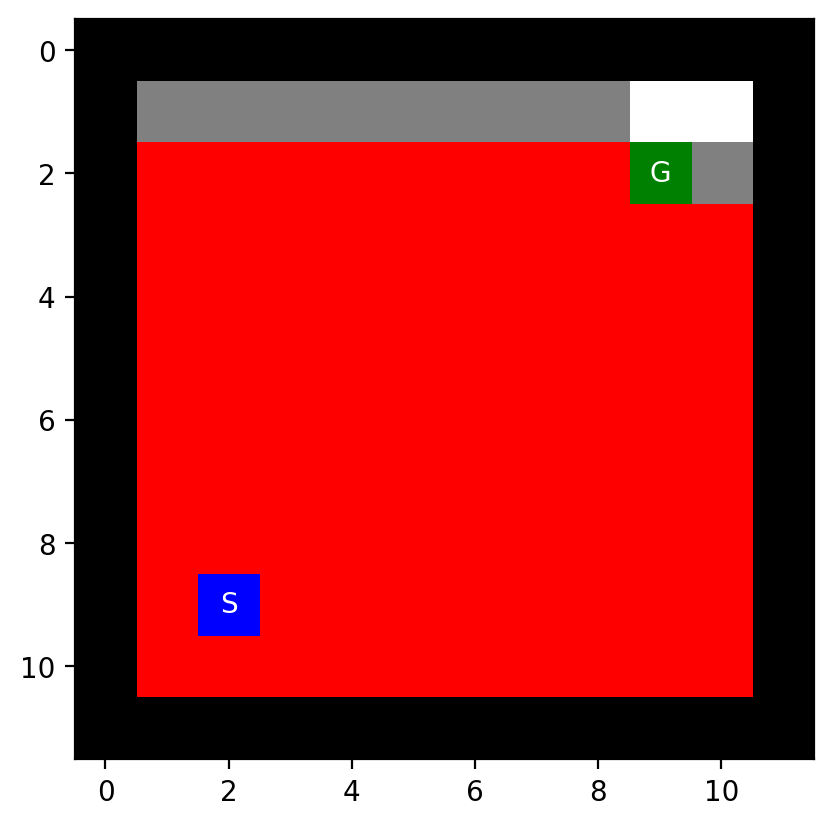

path_cost: 88 num_nodes_expanded: 118 max_tree_depth: 87 max_nodes_in_memory: 117 max_frontier_size: 121 

Path_End: Node - pos = (9, 2); action = EAST; cost = 18


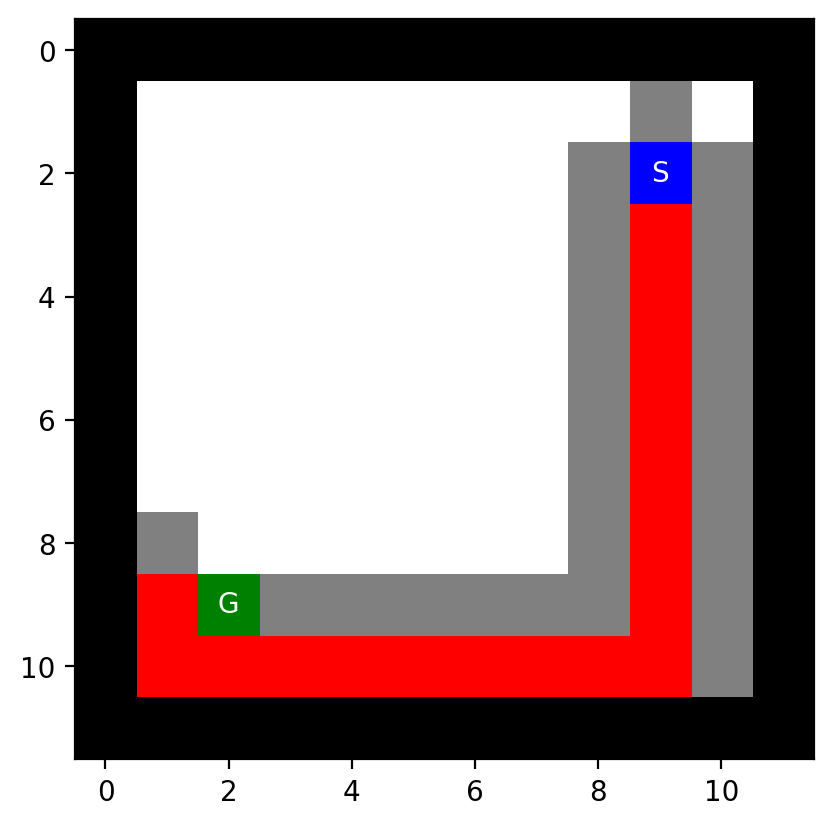

path_cost: 18 num_nodes_expanded: 41 max_tree_depth: 17 max_nodes_in_memory: 40 max_frontier_size: 44 

Path_End: Node - pos = (21, 1); action = WEST; cost = 146


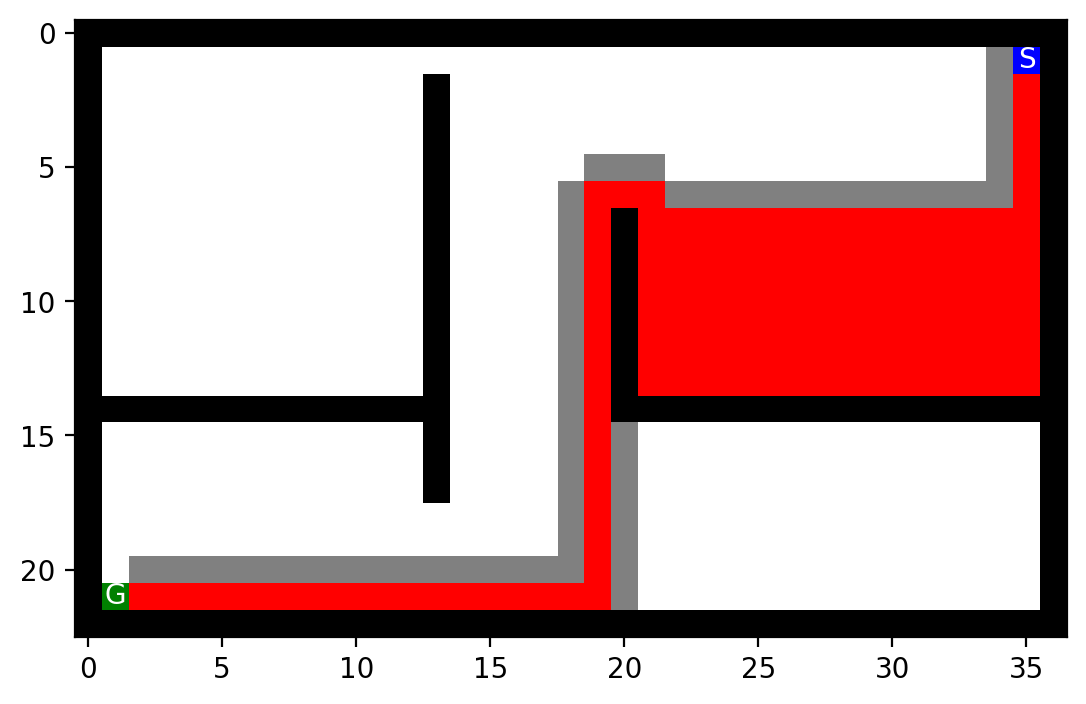

path_cost: 146 num_nodes_expanded: 266 max_tree_depth: 145 max_nodes_in_memory: 264 max_frontier_size: 268 

Path_End: Node - pos = (1, 1); action = NORTH; cost = 27


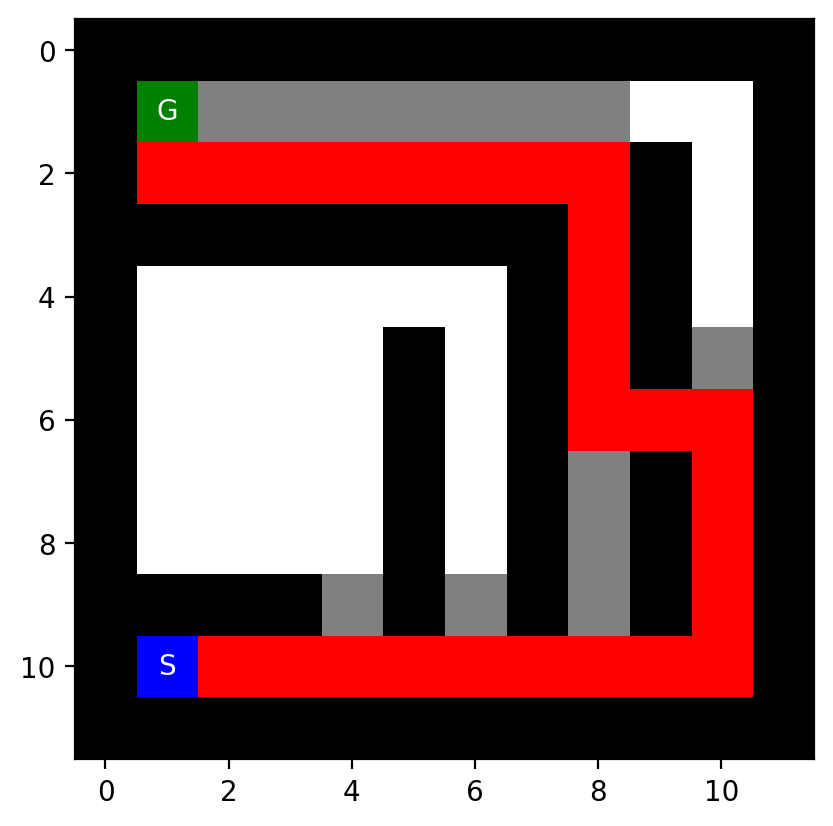

path_cost: 27 num_nodes_expanded: 27 max_tree_depth: 26 max_nodes_in_memory: 27 max_frontier_size: 31 

Path_End: Node - pos = (2, 9); action = EAST; cost = 72


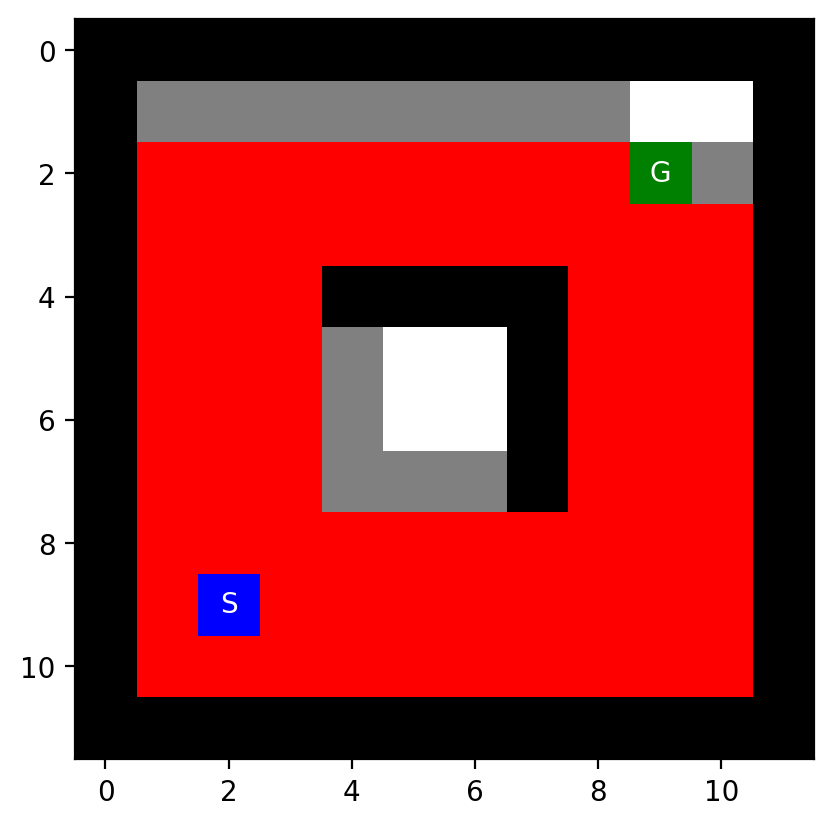

path_cost: 72 num_nodes_expanded: 94 max_tree_depth: 71 max_nodes_in_memory: 93 max_frontier_size: 97 



In [24]:
# testing DFS Mazes
# doesn not work on open maze
test_mazes(DFS, 1000000, None)

How does BFS and DFS deal with loops (cycles)?

### Discussion

##### BFS deals with cycles by constanly keeping a list of all nodes explored as the algorithm runs, then stopping exploring when it reaches a node it has already explored.  Then, after all the necessary nodes are explored in the maze to reach the goal state, it picks the best path out of all that was explored, and since a cycle will never create the best path to the goal state, the algorithm will never choose that as the solution. As for DFS, it delas with cycles by calling a seperate function that checks if the current node has already been explored. If the node has been explored, then instead of adding another node to the path and more nodes to the fronteir, the algorithm will just check the next node in the fronteir, effectivley ignoring the cycle.  

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

### Discussion

##### For BFS, my implementation is complete as all mazes are able to be solved given enough time and memory, and it is optimal as it always finds the best path due to the fact that each step in the maze costs the same. Both the time and space complexity of my BFS algorith is O(b^d), where b is the maximum branching factor and d is the depth of the optimal solution.

##### For DFS, my implementation is complete in all spaces without cycles, but there are some instances where cycles can interrupt the algorithm, so it is incomplete for those infinite environments. Furthermore, my implementation is not optimal as it simply returns the first path from the initial state to the goal state that it finds. The time complexity is O(b^m), where b is the maximum branching factor and m is the maximum depth of the tree. The space complexity is O(bm) with the same values for b and m. 

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides).

In [25]:
# Your code goes here

def greedy_hueristic(node, goal_pos):
    x = abs(node.pos[0] - goal_pos[0])
    y = abs(node.pos[1] - goal_pos[1])
    return (x*x) + (y*y)

def A_hueristic(node, goal_pos):
    x = abs(node.pos[0] - goal_pos[0])
    y = abs(node.pos[1] - goal_pos[1])
    h_huer =  (x*x) + (y*y)
    g_huer = node.cost
    return h_huer + g_huer

# Baseline Best First Search algorithm
# Add greedy_hueristic for Greedt Best First Search and A_hueristic for A* Search
def Best_FS(maze, limit, hueristic):
    # finds start and end points of maze
    maze_points = find_start_end(maze)
    start = maze_points[0]
    end = maze_points[1]

    path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = 0, 0, 0, 0, 0

    # creates root node and frontier
    cur_node = Node(start, None, None, 0)
    reached = {start: cur_node}
    if cur_node.pos == end:
        return(cur_node, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size)
    frontier = [cur_node] # is a priority queue here
    

    # continues to expand frontier until end node is found
    while frontier != []:
        max_frontier_size = max(max_frontier_size, len(frontier))
        cur_node = frontier.pop(0)

        if cur_node.pos == end:
            path_cost = cur_node.cost
            num_nodes_expanded = len(reached)
            return(cur_node, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size)
        
        max_tree_depth = max(max_tree_depth, cur_node.cost)
        max_nodes_in_memory = max(max_nodes_in_memory, len(reached))
        cur_node_children = expand(maze, cur_node, reached)
        for child in cur_node_children:
            child_state = child.pos
            if child_state not in reached or child.cost < reached[child_state].cost:
                reached[child_state] = child
                frontier.append(child)
                frontier.sort(key = lambda x: hueristic(x, end))

    print("BFS failed")
    return None

Node - pos = (8, 1); action = WEST; cost = 29


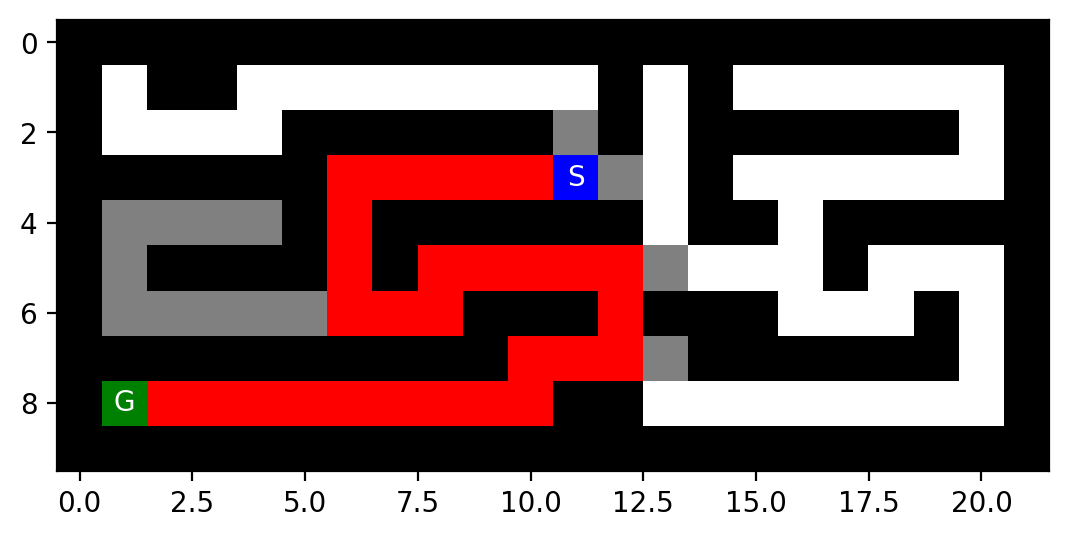

path_cost: 29 num_nodes_expanded: 44 max_tree_depth: 28 max_nodes_in_memory: 43 max_frontier_size: 5 

Node - pos = (16, 1); action = WEST; cost = 152


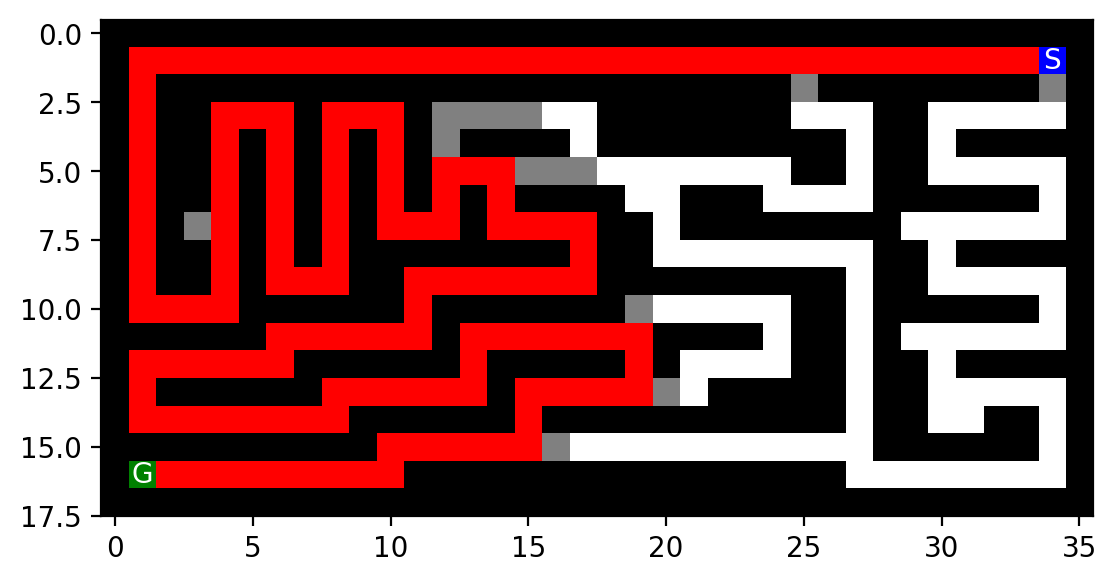

path_cost: 152 num_nodes_expanded: 167 max_tree_depth: 151 max_nodes_in_memory: 166 max_frontier_size: 8 

Node - pos = (35, 1); action = SOUTH; cost = 210


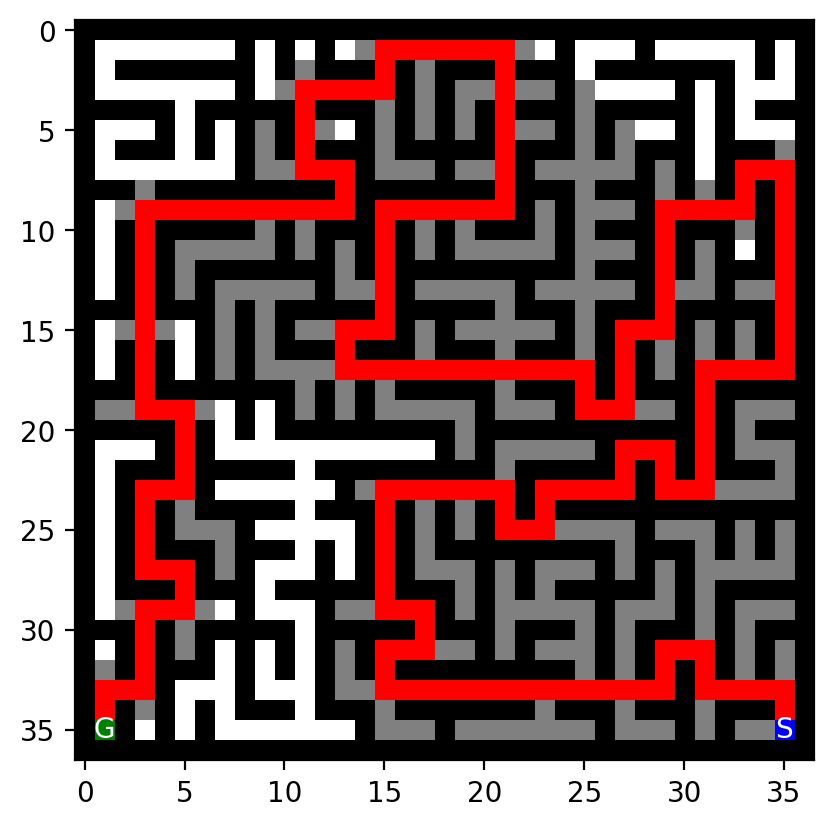

path_cost: 210 num_nodes_expanded: 491 max_tree_depth: 209 max_nodes_in_memory: 490 max_frontier_size: 22 

Path_End: Node - pos = (2, 9); action = EAST; cost = 14


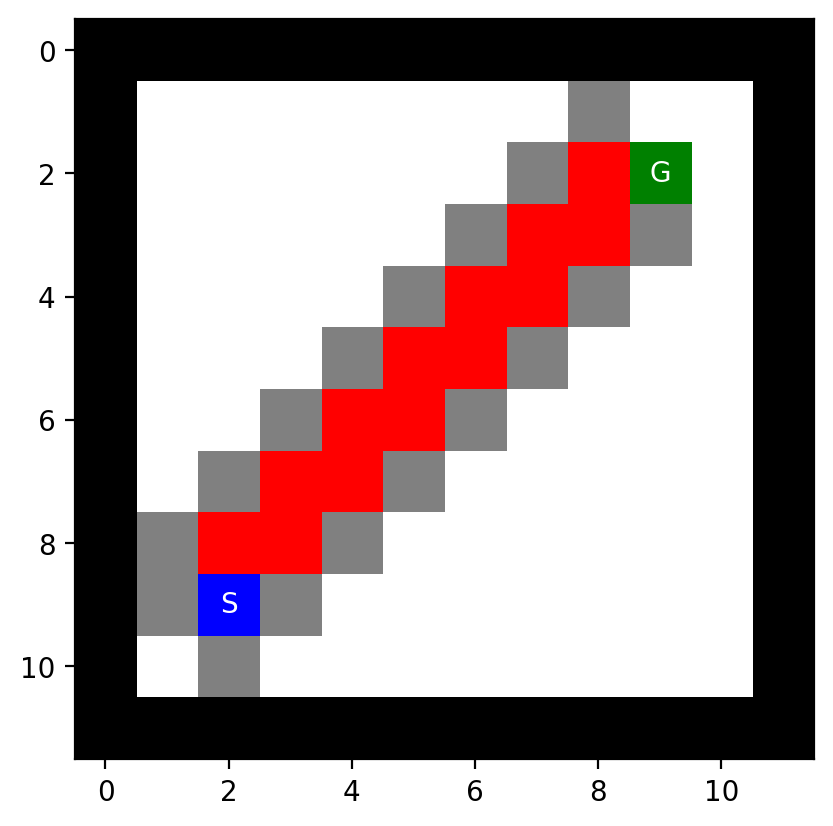

path_cost: 14 num_nodes_expanded: 32 max_tree_depth: 13 max_nodes_in_memory: 30 max_frontier_size: 18 

Path_End: Node - pos = (9, 2); action = SOUTH; cost = 14


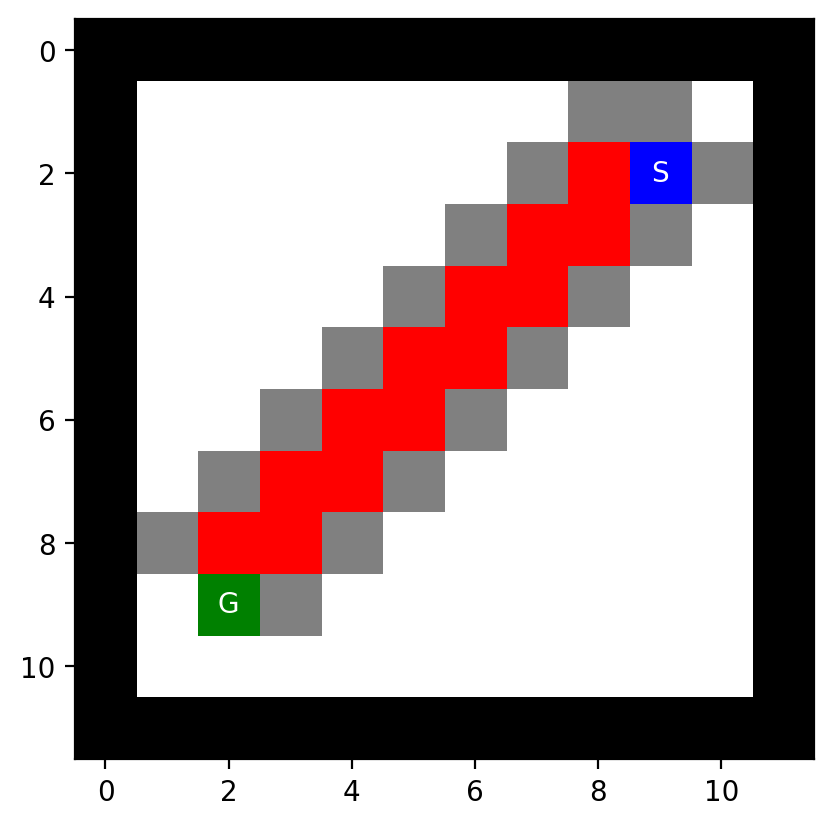

path_cost: 14 num_nodes_expanded: 32 max_tree_depth: 13 max_nodes_in_memory: 30 max_frontier_size: 18 

Path_End: Node - pos = (21, 1); action = SOUTH; cost = 54


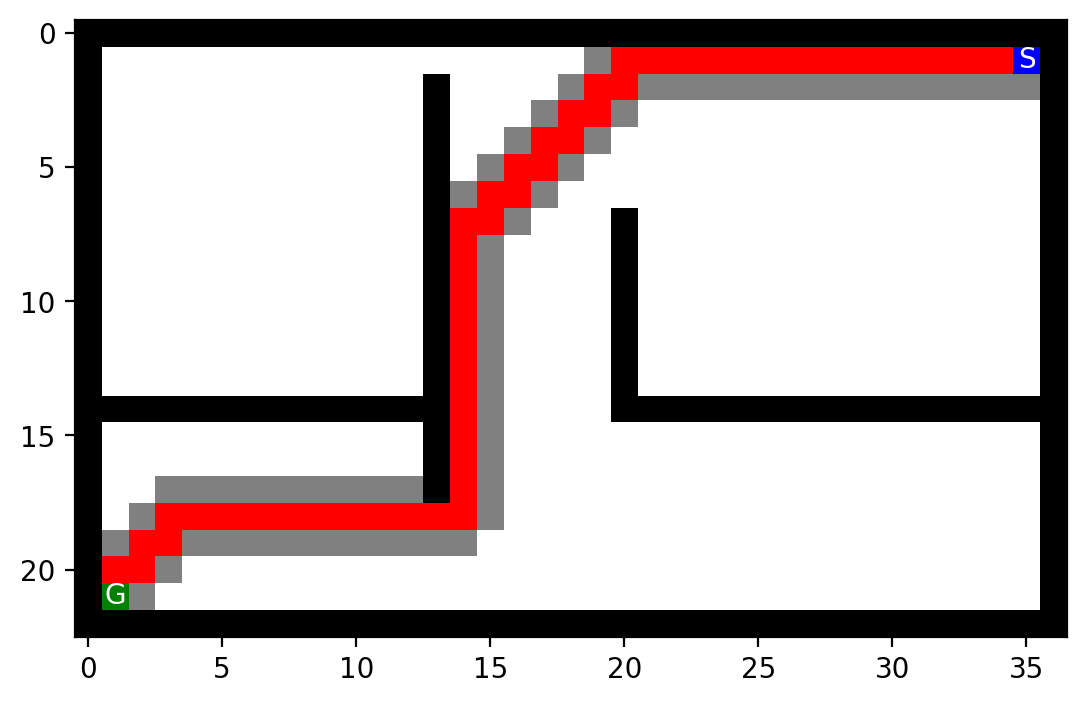

path_cost: 54 num_nodes_expanded: 117 max_tree_depth: 53 max_nodes_in_memory: 116 max_frontier_size: 63 

Path_End: Node - pos = (1, 1); action = WEST; cost = 35


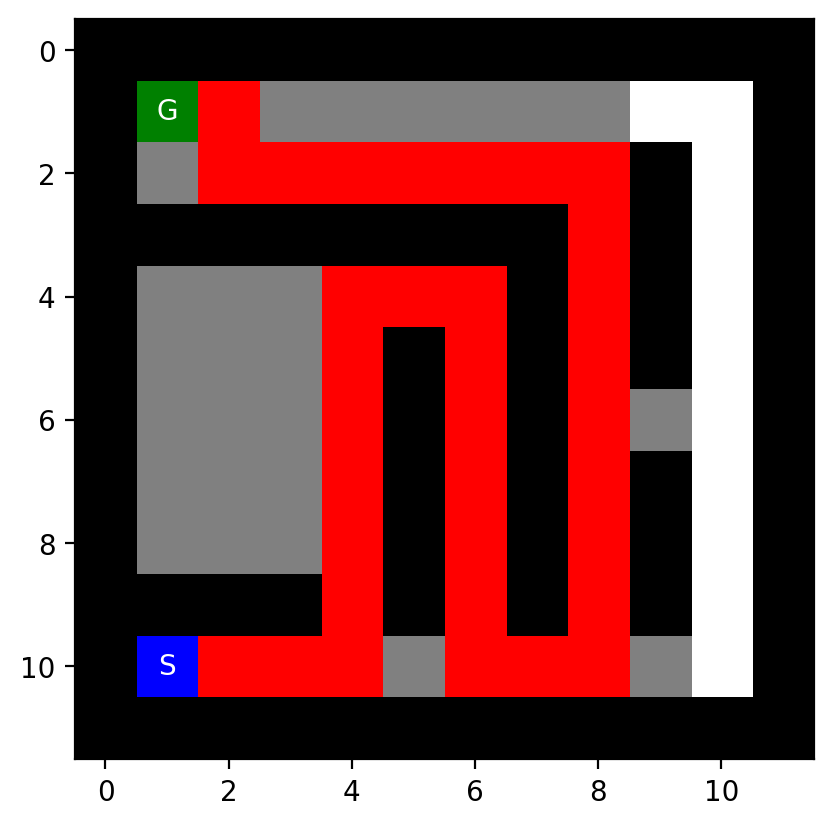

path_cost: 35 num_nodes_expanded: 61 max_tree_depth: 34 max_nodes_in_memory: 60 max_frontier_size: 10 

Path_End: Node - pos = (2, 9); action = EAST; cost = 16


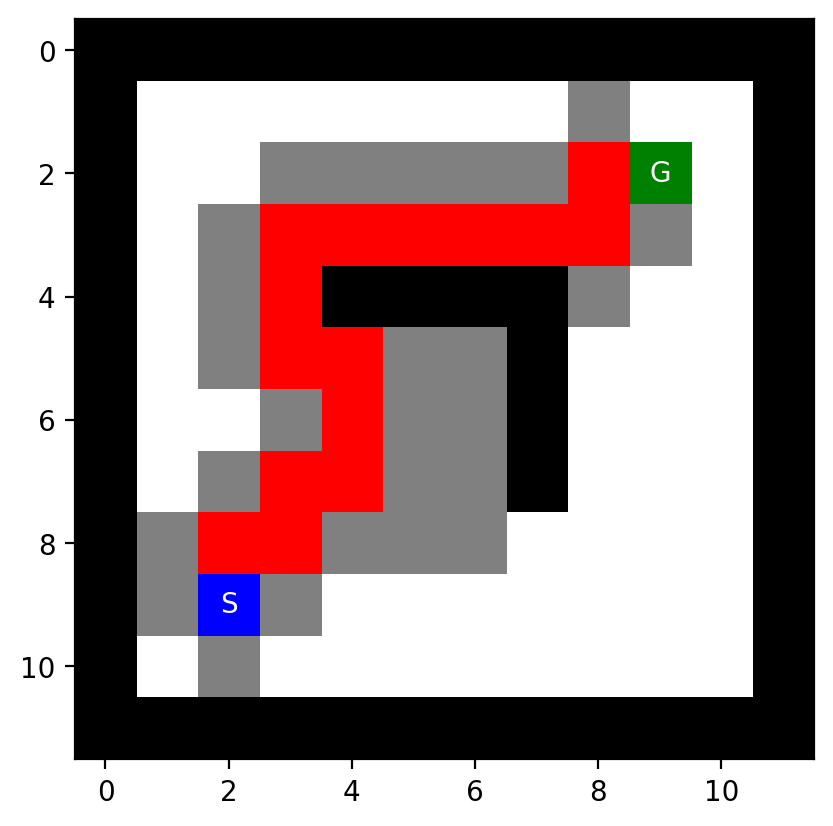

path_cost: 16 num_nodes_expanded: 43 max_tree_depth: 15 max_nodes_in_memory: 41 max_frontier_size: 21 

-------------------------------Visual-Seperation------------------------------------
-------------------------------Visual-Seperation------------------------------------
-------------------------------Visual-Seperation------------------------------------
-------------------------------Visual-Seperation------------------------------------
-------------------------------Visual-Seperation------------------------------------
Node - pos = (8, 1); action = WEST; cost = 29


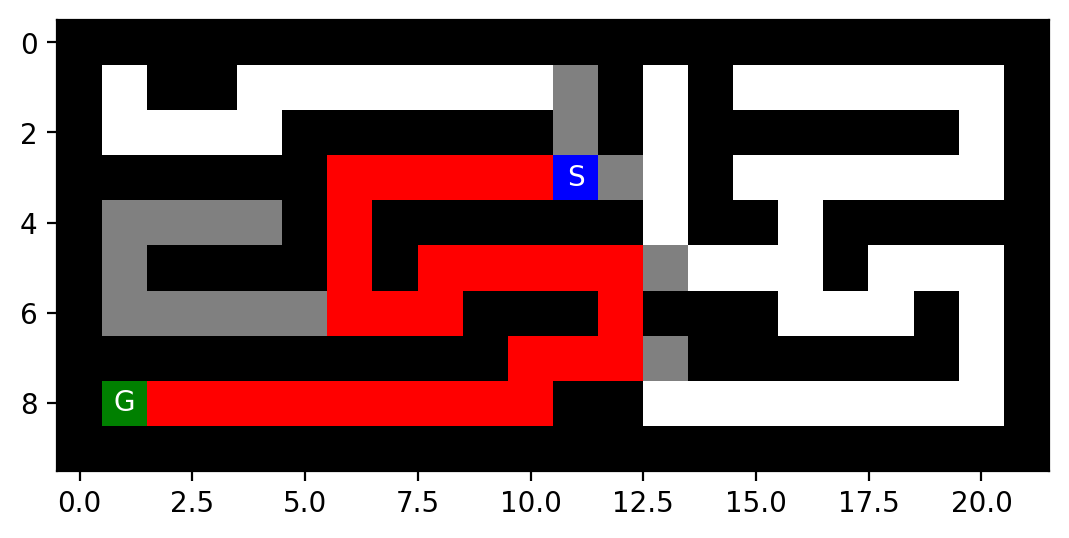

path_cost: 29 num_nodes_expanded: 45 max_tree_depth: 28 max_nodes_in_memory: 44 max_frontier_size: 5 

Node - pos = (16, 1); action = WEST; cost = 152


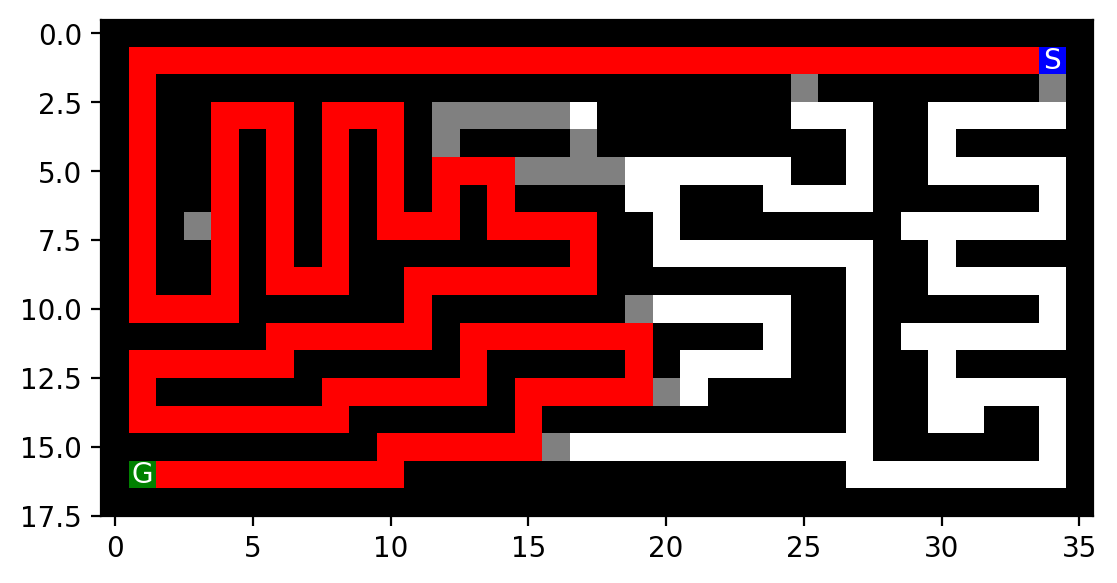

path_cost: 152 num_nodes_expanded: 170 max_tree_depth: 151 max_nodes_in_memory: 169 max_frontier_size: 9 

Node - pos = (35, 1); action = SOUTH; cost = 210


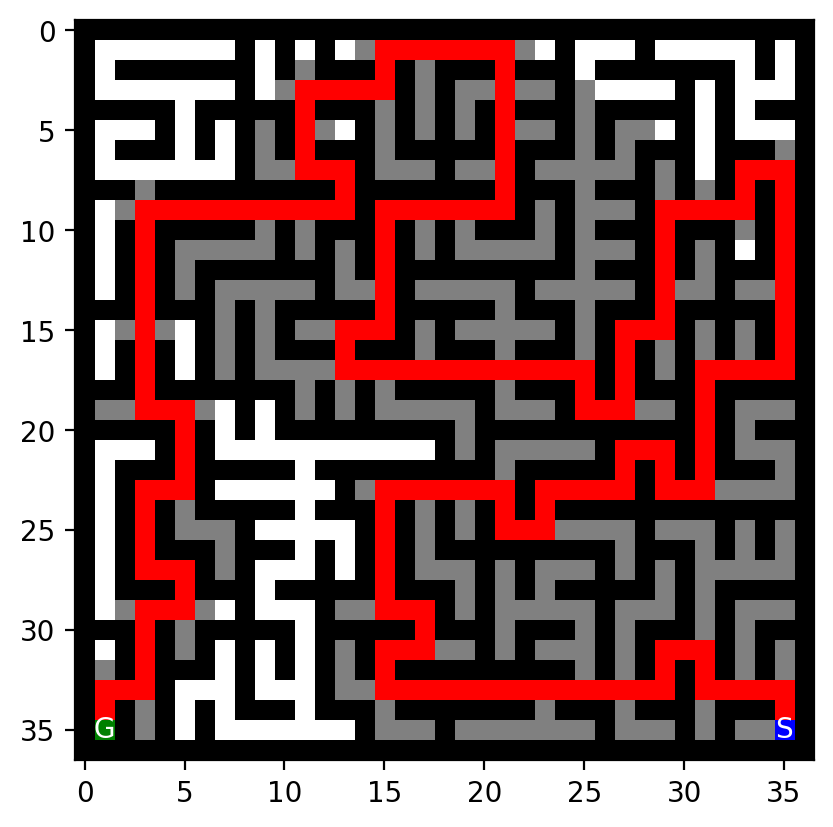

path_cost: 210 num_nodes_expanded: 493 max_tree_depth: 209 max_nodes_in_memory: 492 max_frontier_size: 21 

Path_End: Node - pos = (2, 9); action = EAST; cost = 14


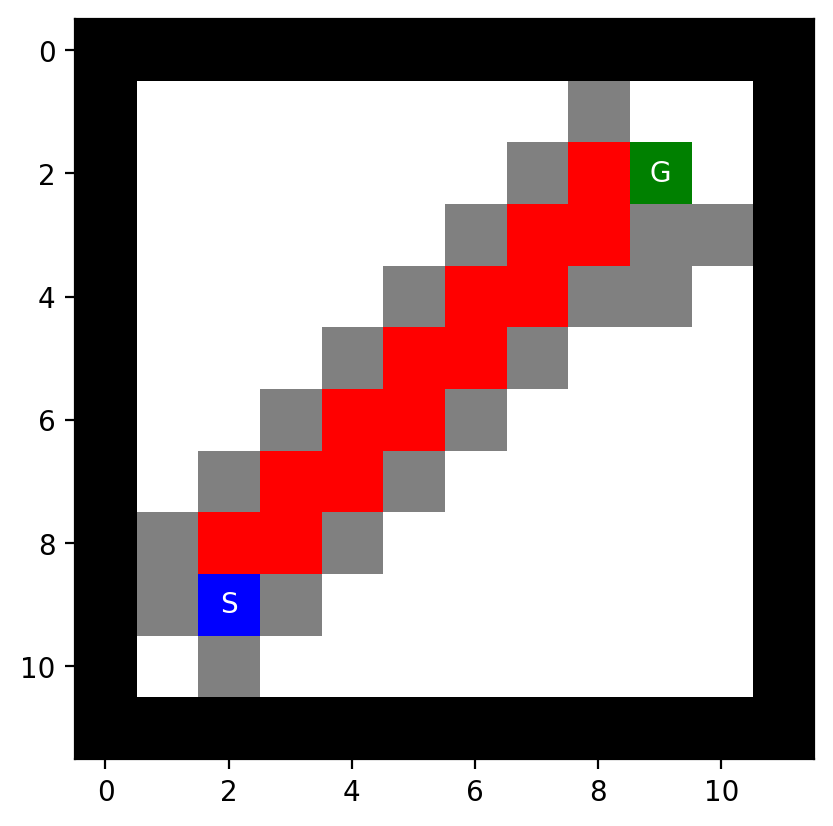

path_cost: 14 num_nodes_expanded: 34 max_tree_depth: 13 max_nodes_in_memory: 32 max_frontier_size: 19 

Path_End: Node - pos = (9, 2); action = SOUTH; cost = 14


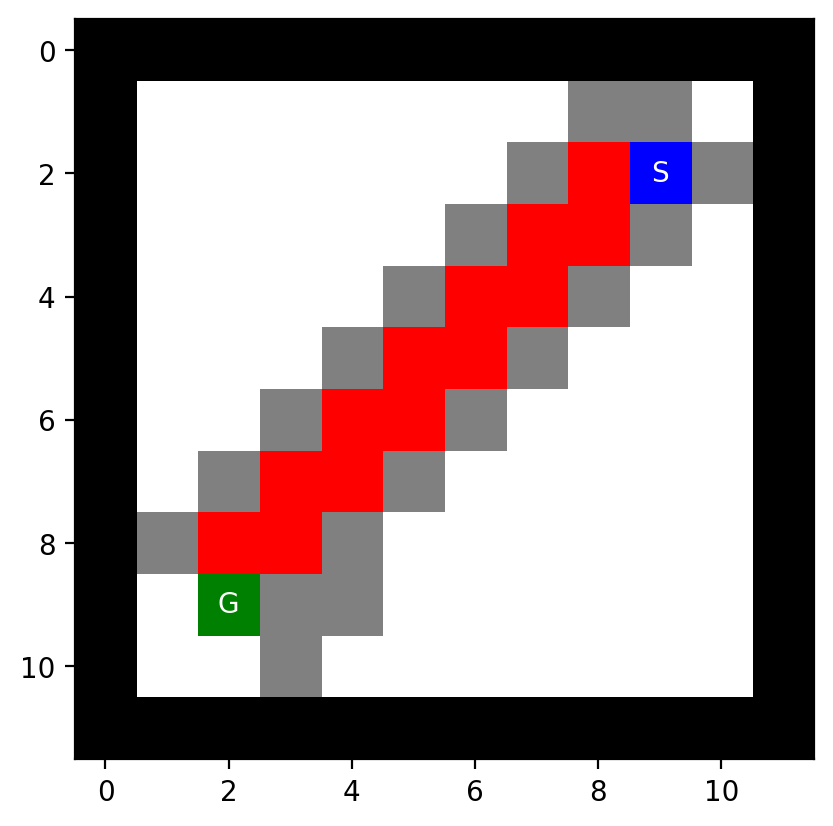

path_cost: 14 num_nodes_expanded: 34 max_tree_depth: 13 max_nodes_in_memory: 32 max_frontier_size: 19 

Path_End: Node - pos = (21, 1); action = SOUTH; cost = 54


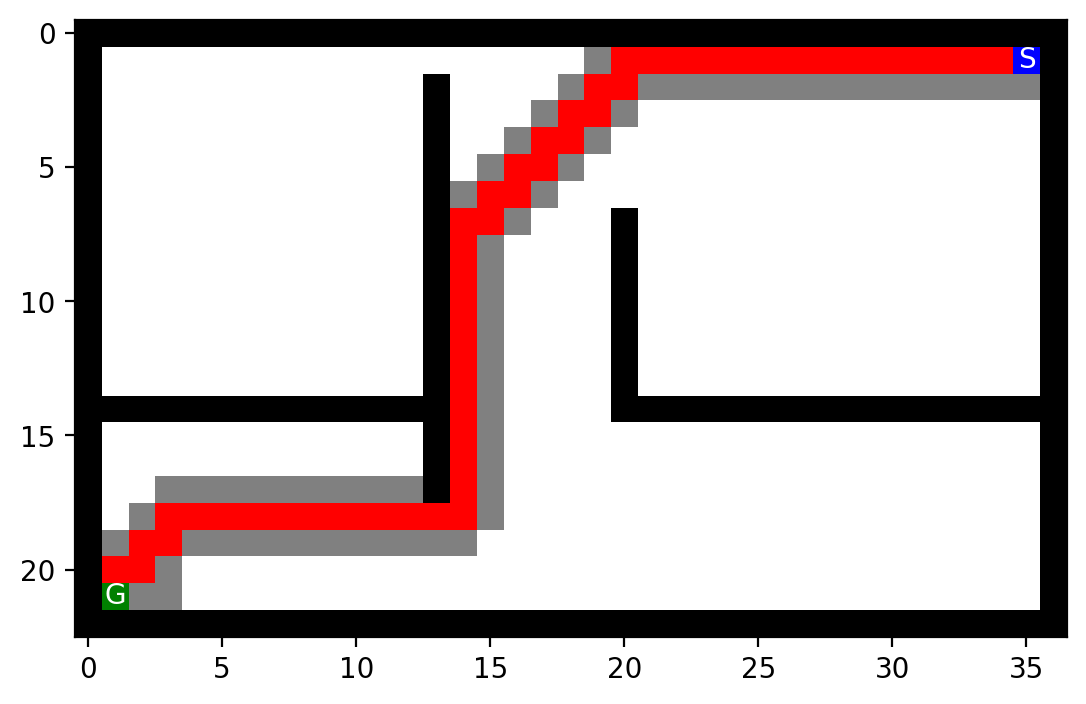

path_cost: 54 num_nodes_expanded: 118 max_tree_depth: 53 max_nodes_in_memory: 117 max_frontier_size: 63 

Path_End: Node - pos = (1, 1); action = WEST; cost = 23


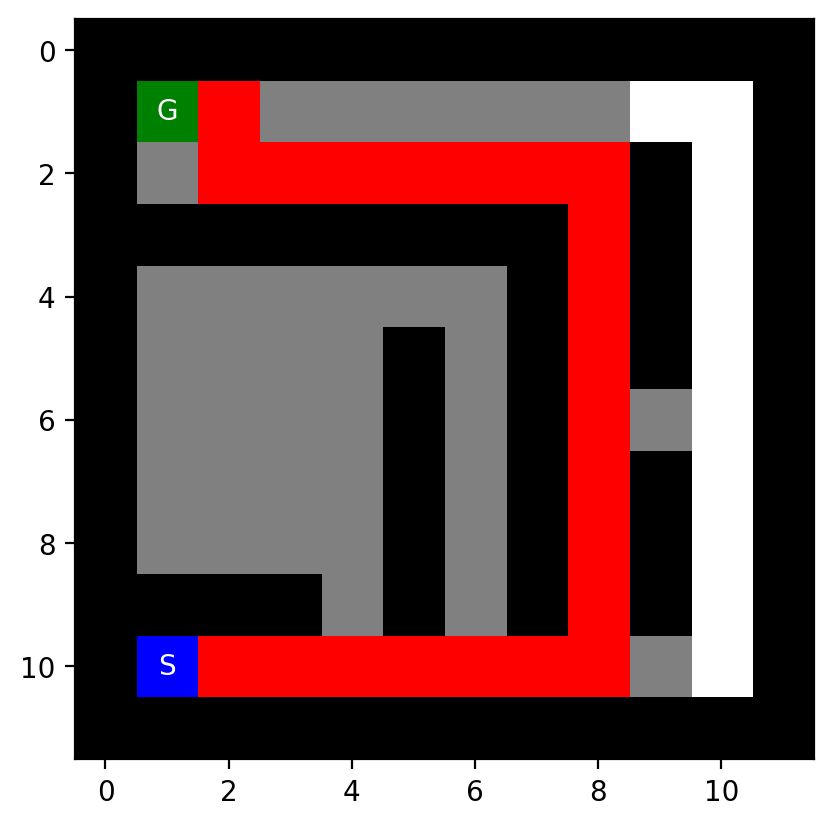

path_cost: 23 num_nodes_expanded: 61 max_tree_depth: 22 max_nodes_in_memory: 61 max_frontier_size: 10 

Path_End: Node - pos = (2, 9); action = EAST; cost = 16


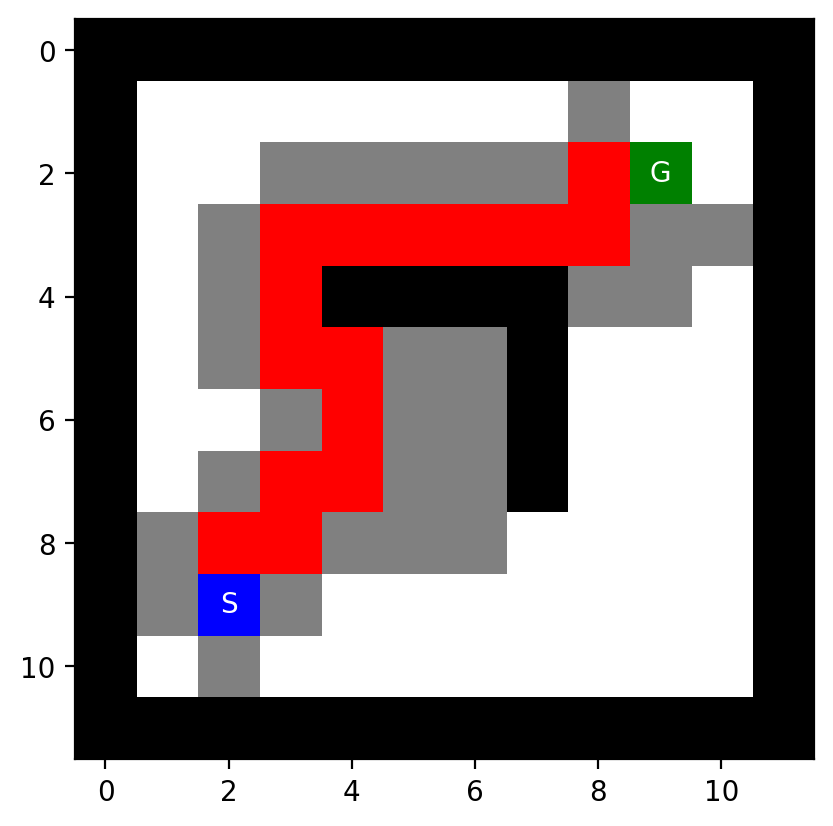

path_cost: 16 num_nodes_expanded: 45 max_tree_depth: 15 max_nodes_in_memory: 43 max_frontier_size: 22 



In [26]:
# testing Greedy Best_FS Mazes
test_mazes(Best_FS, 1000000, greedy_hueristic)

print("-------------------------------Visual-Seperation------------------------------------")
print("-------------------------------Visual-Seperation------------------------------------")
print("-------------------------------Visual-Seperation------------------------------------")
print("-------------------------------Visual-Seperation------------------------------------")
print("-------------------------------Visual-Seperation------------------------------------")

# testing A* Mazes
test_mazes(Best_FS, 1000000, A_hueristic)


Are your implementations complete and optimal? What is the time and space complexity?

### Discussion

##### For Greedy Best First Search, my implementation is complete as all mazes are able to be solved given that the mazes each provide a finite space, and my implementation is not optimal as the algorithm selects that first possible solution and does has no way of absolutley confirming that the found path is the best solution, and the hueristic implemented cannot gaurantee the best path. Both the time and space complexity of my Greedy Best First Search algorith are O(b^m), where b is the maximum branching factor and m is the maximum depth of the tree.

##### For A*, my implementation is complete my implementation is complete as all mazes are able to be solved given enough time and meory. My implementation is also as optimal and a search algorith can be as although the algorithm does not check every possible path to confirm the best path, the huerist is the best possible one given for solving mazes. Both the time and space complexity of my A* algorith are exponential.

## Task 4: Comparison and discussion [20 Points]

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [27]:
# Add code
import pandas as pd

maze_names = ["small_maze.txt", "medium_maze.txt", "large_maze.txt", "empty_maze.txt", "empty_2_maze.txt", "open_maze.txt", "loops_maze.txt", "wall_maze.txt"]
table_dict = {}

for maze in maze_names:
    with open(maze, "r") as f:
        maze_str = f.read()
    maze_read = mh.parse_maze(maze_str)
    my_maze = copy.deepcopy(maze_read)

    
    df = pd.DataFrame(columns = ["algorithm", "path_cost", "num_nodes_expanded", "max_tree_depth", "max_nodes_in_memory", "max_frontier_size"])

    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = BFS(my_maze)
    df.loc[len(df.index)] = ["BFS", path_cost, num_nodes_expanded,  max_tree_depth, max_nodes_in_memory, max_frontier_size]
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS(my_maze, 10000000)
    df.loc[len(df.index)] = ["DFS", path_cost, num_nodes_expanded,  max_tree_depth, max_nodes_in_memory, max_frontier_size]
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = Best_FS(my_maze, 10000000, greedy_hueristic)
    df.loc[len(df.index)] = ["GBS", path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size]
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = Best_FS(my_maze, 10000000, A_hueristic)
    df.loc[len(df.index)] = ["A*", path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size]

    table_dict[maze] = df

for maze in table_dict:
    print("Statistics for maze:", maze)
    display(table_dict[maze])


Statistics for maze: small_maze.txt


,algorithm,path_cost,num_nodes_expanded,max_tree_depth,max_nodes_in_memory,max_frontier_size
0,BFS,19,92,18,92,9
1,DFS,29,56,28,54,58
2,GBS,29,44,28,43,5
3,A*,29,45,28,44,5


Statistics for maze: medium_maze.txt


,algorithm,path_cost,num_nodes_expanded,max_tree_depth,max_nodes_in_memory,max_frontier_size
0,BFS,68,270,67,270,8
1,DFS,76,153,75,151,155
2,GBS,152,167,151,166,8
3,A*,152,170,151,169,9


Statistics for maze: large_maze.txt


,algorithm,path_cost,num_nodes_expanded,max_tree_depth,max_nodes_in_memory,max_frontier_size
0,BFS,210,622,209,622,9
1,DFS,210,332,209,329,333
2,GBS,210,491,209,490,22
3,A*,210,493,209,492,21


Statistics for maze: empty_maze.txt


,algorithm,path_cost,num_nodes_expanded,max_tree_depth,max_nodes_in_memory,max_frontier_size
0,BFS,14,95,13,95,12
1,DFS,88,118,87,117,121
2,GBS,14,32,13,30,18
3,A*,14,34,13,32,19


Statistics for maze: empty_2_maze.txt


,algorithm,path_cost,num_nodes_expanded,max_tree_depth,max_nodes_in_memory,max_frontier_size
0,BFS,14,95,13,95,11
1,DFS,18,41,17,40,44
2,GBS,14,32,13,30,18
3,A*,14,34,13,32,19


Statistics for maze: open_maze.txt


,algorithm,path_cost,num_nodes_expanded,max_tree_depth,max_nodes_in_memory,max_frontier_size
0,BFS,54,683,53,683,23
1,DFS,146,266,145,264,268
2,GBS,54,117,53,116,63
3,A*,54,118,53,117,63


Statistics for maze: loops_maze.txt


,algorithm,path_cost,num_nodes_expanded,max_tree_depth,max_nodes_in_memory,max_frontier_size
0,BFS,23,71,22,71,8
1,DFS,27,27,26,27,31
2,GBS,35,61,34,60,10
3,A*,23,61,22,61,10


Statistics for maze: wall_maze.txt


,algorithm,path_cost,num_nodes_expanded,max_tree_depth,max_nodes_in_memory,max_frontier_size
0,BFS,14,88,13,88,11
1,DFS,72,94,71,93,97
2,GBS,16,43,15,41,21
3,A*,16,45,15,43,22


Complete the following table for each maze.

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |           |                |                |               |                   |
| DFS       |           |                |                |               |                   |
| GBS       |           |                |                |               |                   |
| A*        |           |                |                |               |                   |

__Medium Maze__

...

Present the results as using charts (see [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)).

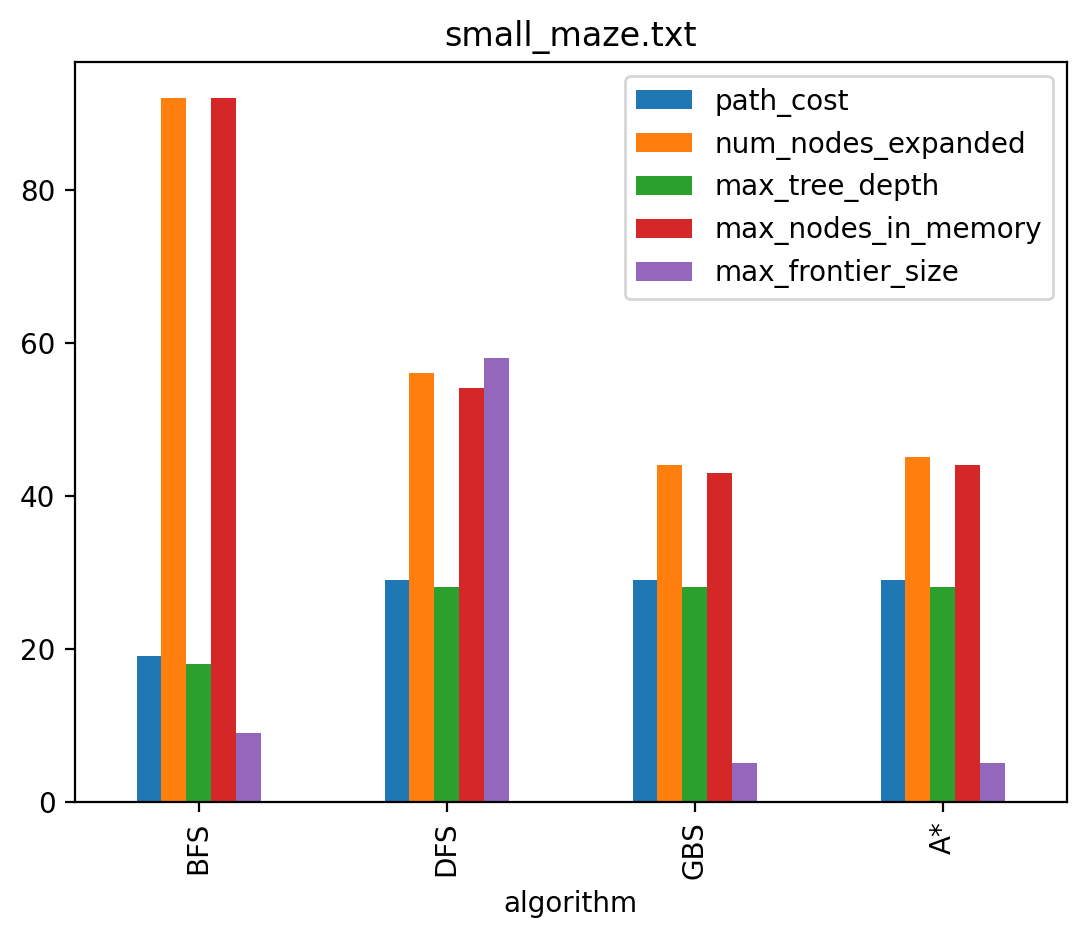

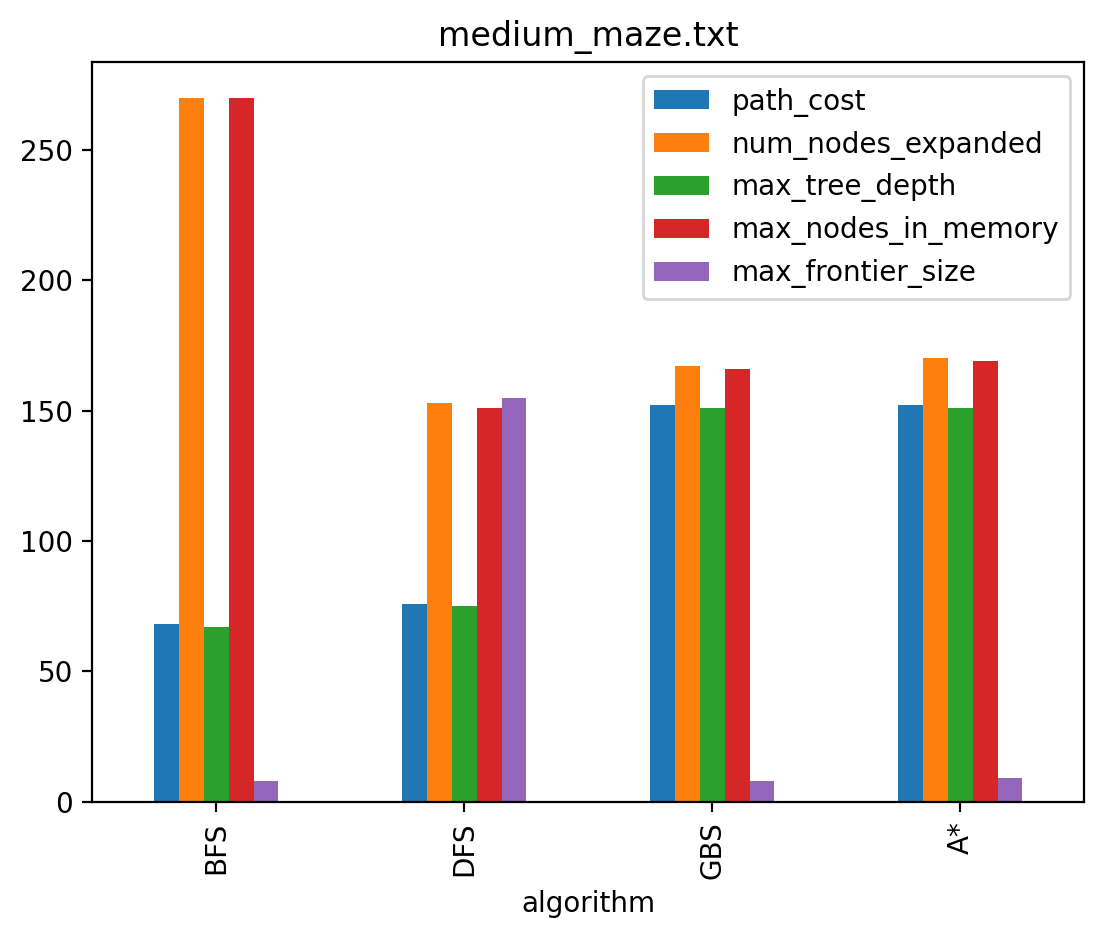

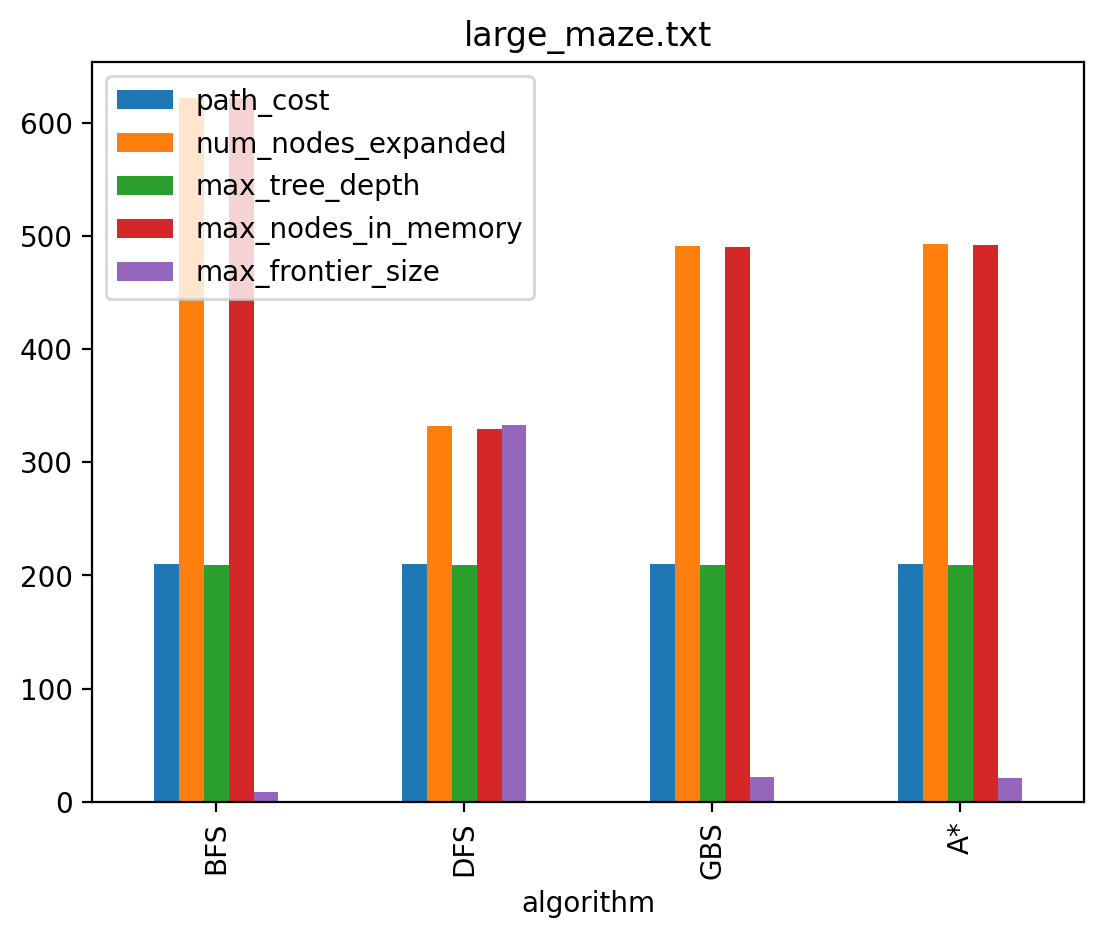

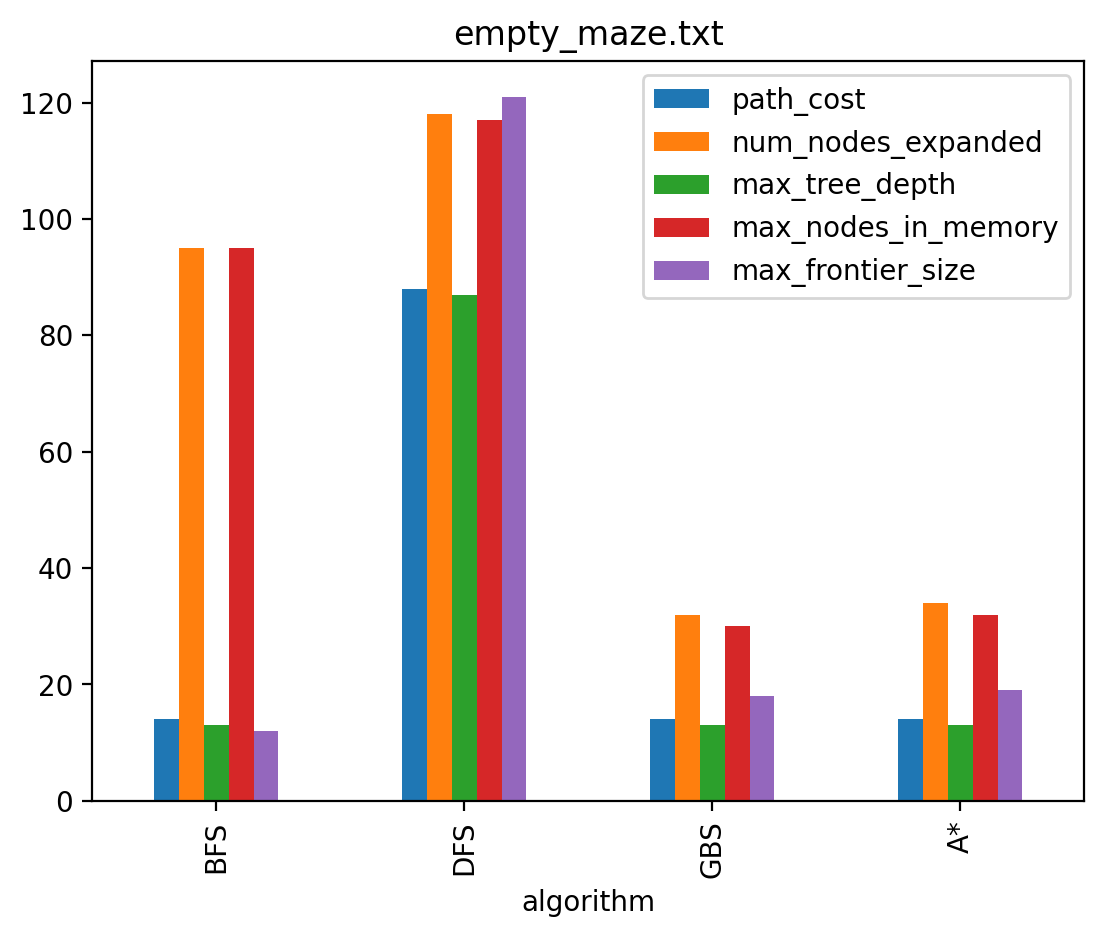

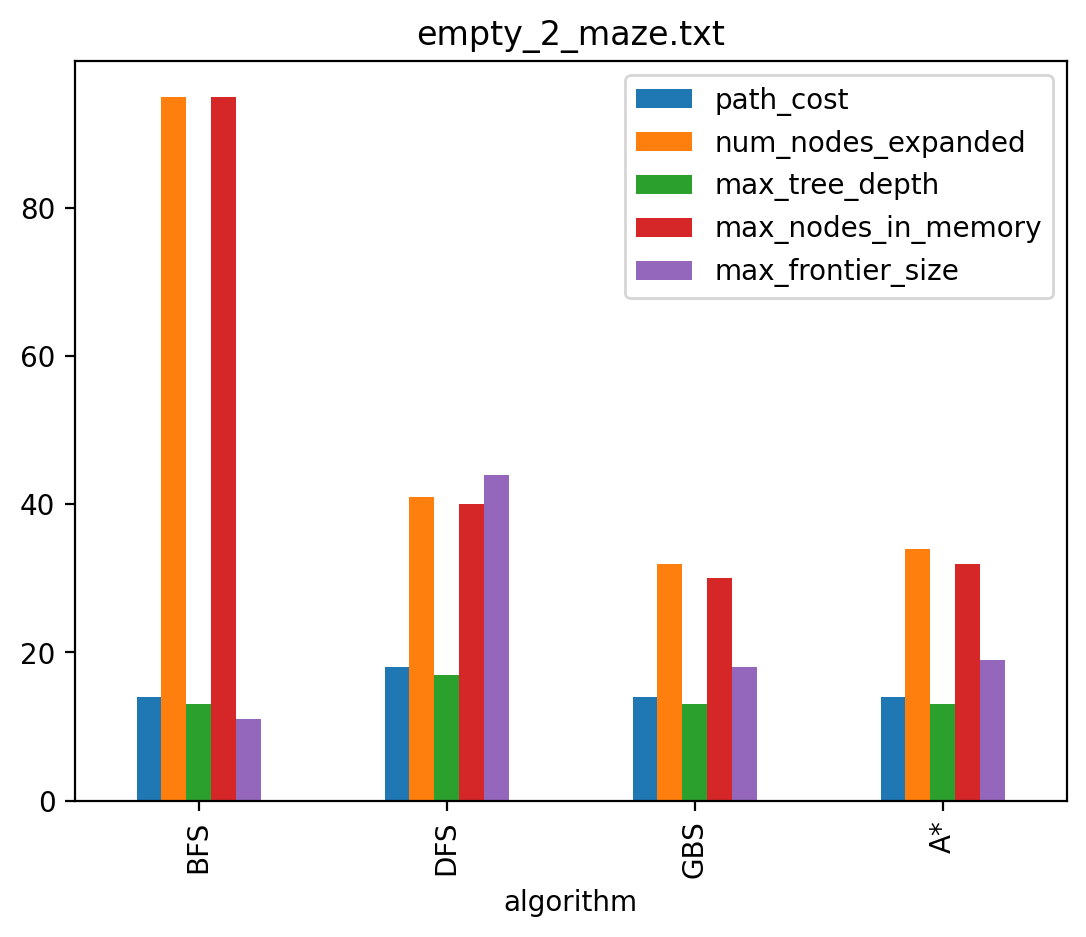

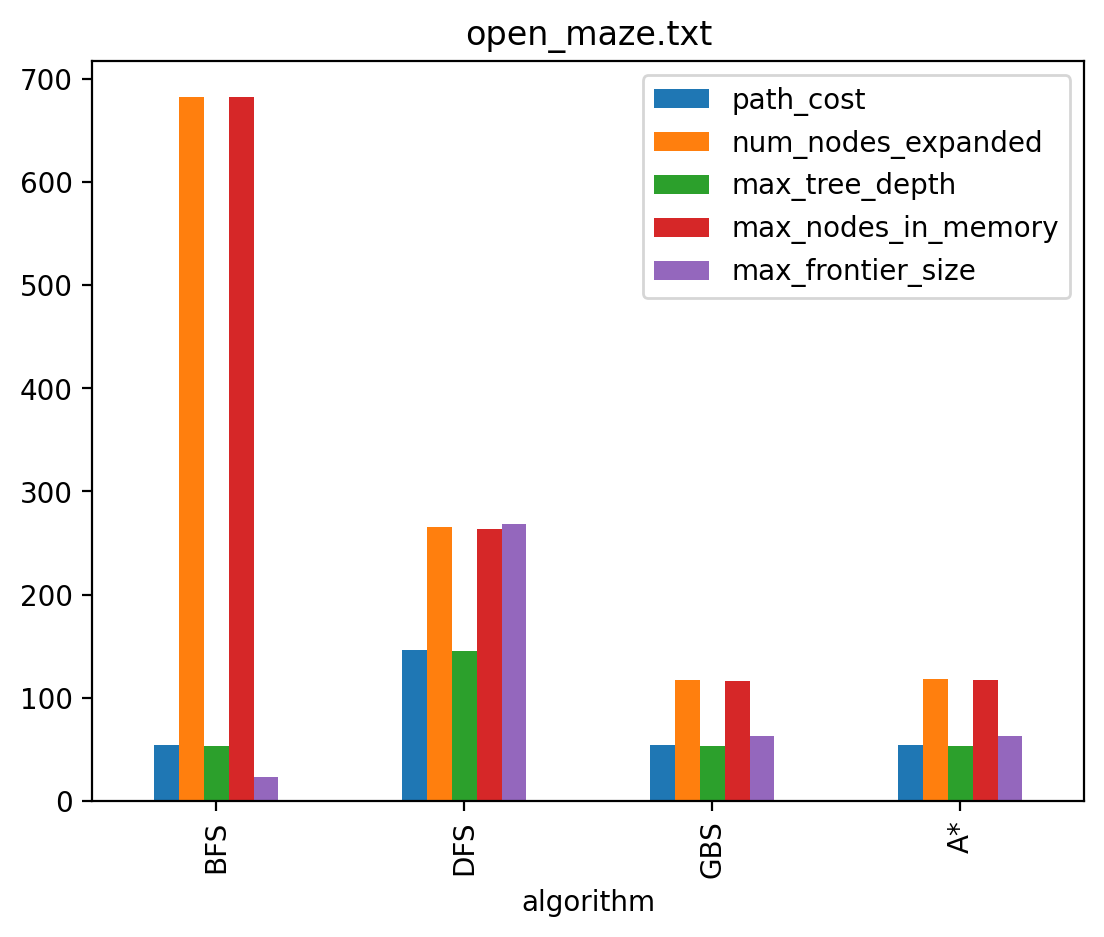

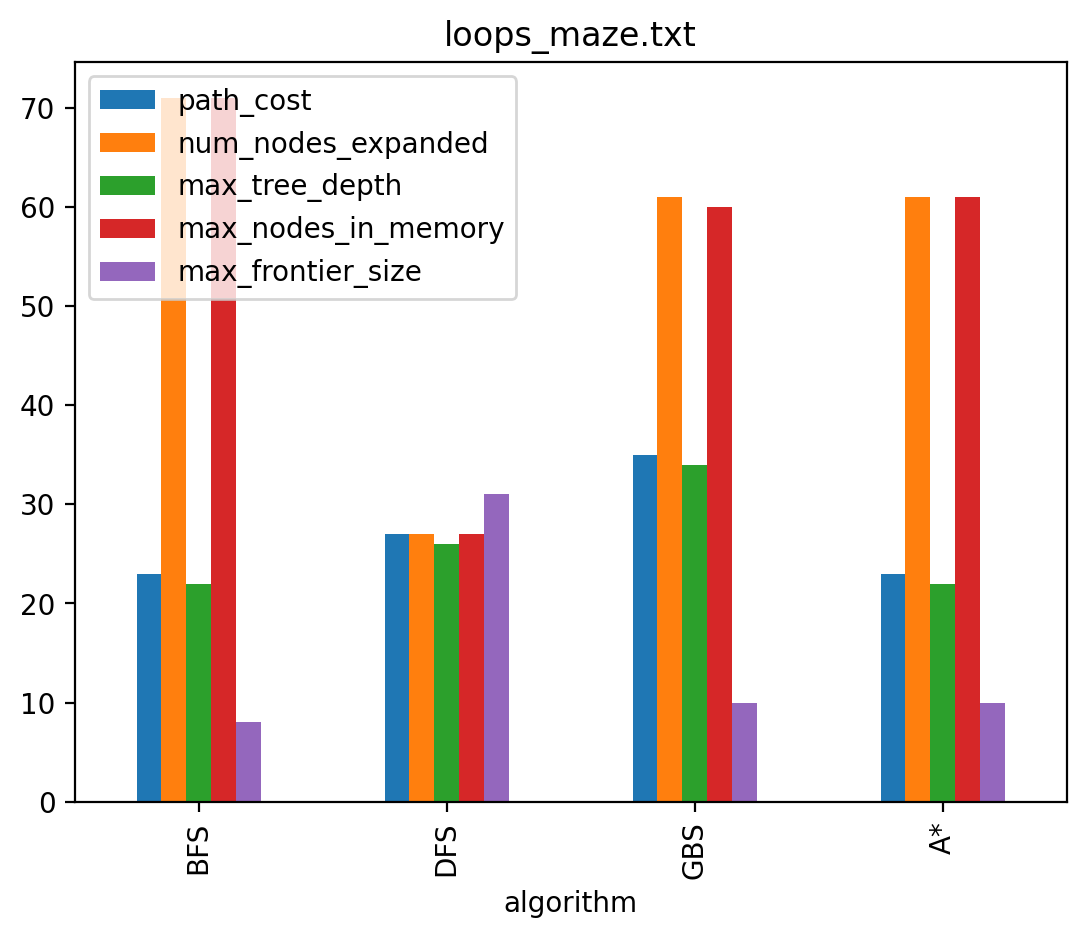

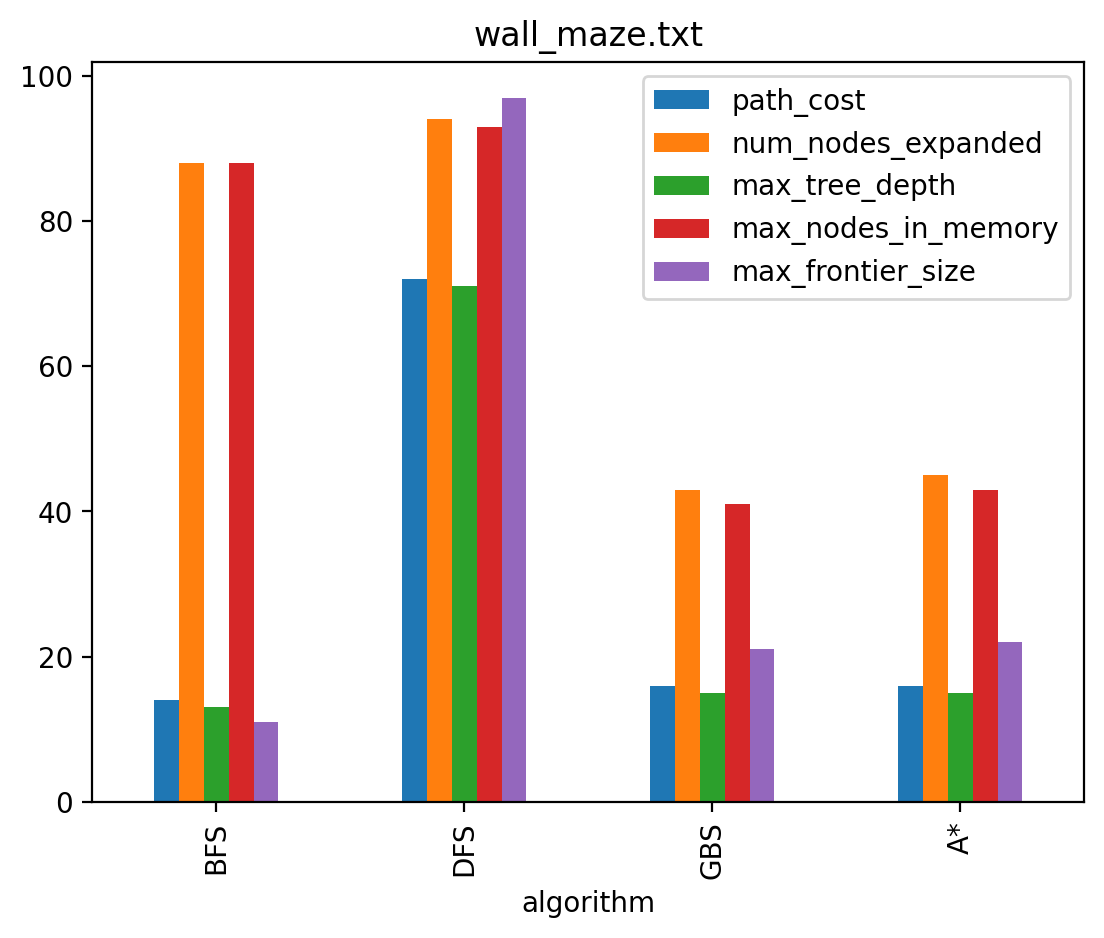

In [28]:
# Add charts
import matplotlib.pyplot as plt

columns = ['algorithm', 'path_cost', 'num_nodes_expanded', 'max_tree_depth', 'max_nodes_in_memory', 'max_frontier_size']

for item in table_dict:
    # creates local dataframe
    df = table_dict[item]

    # creates bar chart for dataframe
    df.plot.bar(x = "algorithm", y = columns[1:], title = item)
    plt.show()

Discuss the most important lessons you have learned from implementing the different search strategies.

### Add discussion

##### The primary thing that I have learned through implementing all these search algorithms, is that there is not necessarily always one best algorithm for every case, each algorithm has its own strengths and weaknesses and can be the best option dpending on the task at hand. Furthermore, I learned that although an algorithms may seem to work for every situation, there are always exceptions that you will have to adjust for as you try more scenarios. For example, as seen through the graphs, Depth First Search seems to consistently be less computationally expensive then Breadth First Search. However, on the wall_maze and empty_maze in particular, DFS performs significantly  just due to the nature of how the maze is layed out and which directions DFS prioritizes.

## Graduate student advanced task: IDS and Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS).

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

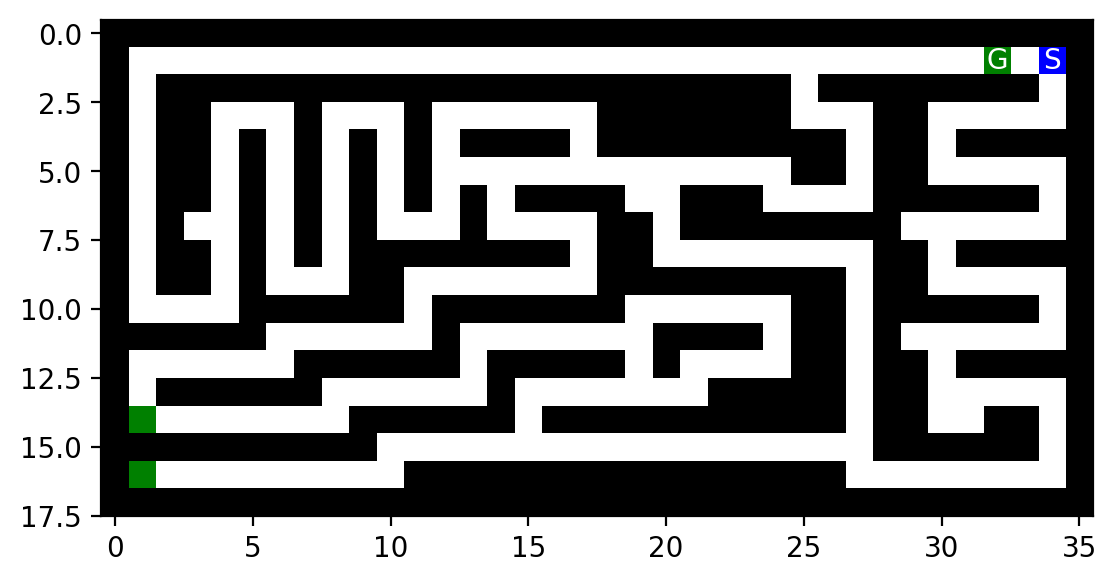

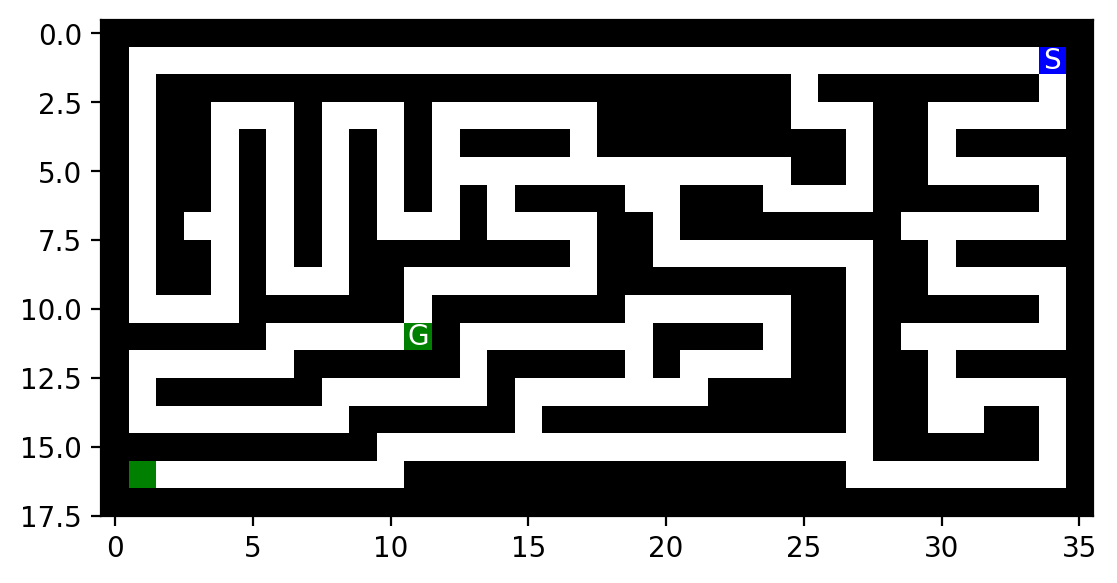

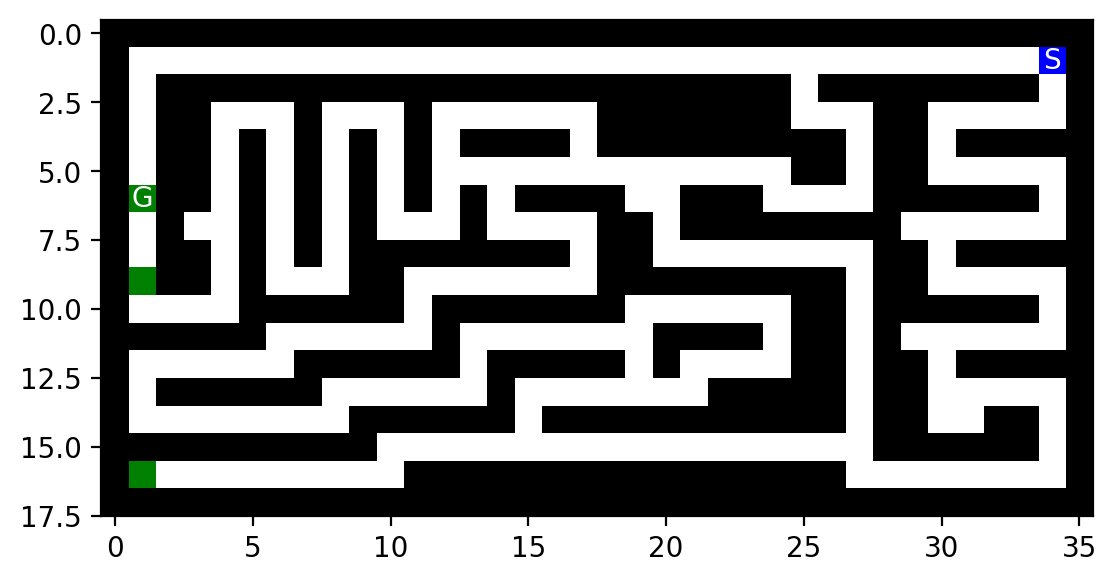

In [29]:
# Your code/answer goes here

import random 

# medium maze
with open("medium_maze.txt", "r") as f:
    maze_str = f.read()
    maze_medium = mh.parse_maze(maze_str)

# initialize 3 mazes with multiple goals
multiple_goals_mazes = []
multiple_goals_mazes.append(copy.deepcopy(maze_medium))
multiple_goals_mazes.append(copy.deepcopy(maze_medium))
multiple_goals_mazes.append(copy.deepcopy(maze_medium))

# randomly assigns new goal states to the mazes
x = 0
while x < 3:
    
    # assigns goals states
    for i in range(len(multiple_goals_mazes[x])):
        for j in range(len(multiple_goals_mazes[x][i])):
            rand_num = random.randint(0, 500)
            if rand_num < 2 and multiple_goals_mazes[x][i][j] != "S" and multiple_goals_mazes[x][i][j] != "X":
                multiple_goals_mazes[x][i][j] = "G"

    # checks to see if enough goals were added, it not then it reruns the loop
    goal_counter = 0
    for i in range(len(multiple_goals_mazes[x])):
        for j in range(len(multiple_goals_mazes[x][i])):
            if multiple_goals_mazes[x][i][j] == "G":
                goal_counter += 1

    if goal_counter < 2:
        multiple_goals_mazes[x] = copy.deepcopy(maze_medium)
        x -= 1
    x += 1

for new_maze in multiple_goals_mazes:
    mh.show_maze(new_maze)
    

def IDS(maze, limit = 1000000, hueristic = None):
    for i in range(limit):
        Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS(maze, i, None)
        result = Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
        if result != "cutoff":
            return result

Node - pos = (8, 1); action = WEST; cost = 29


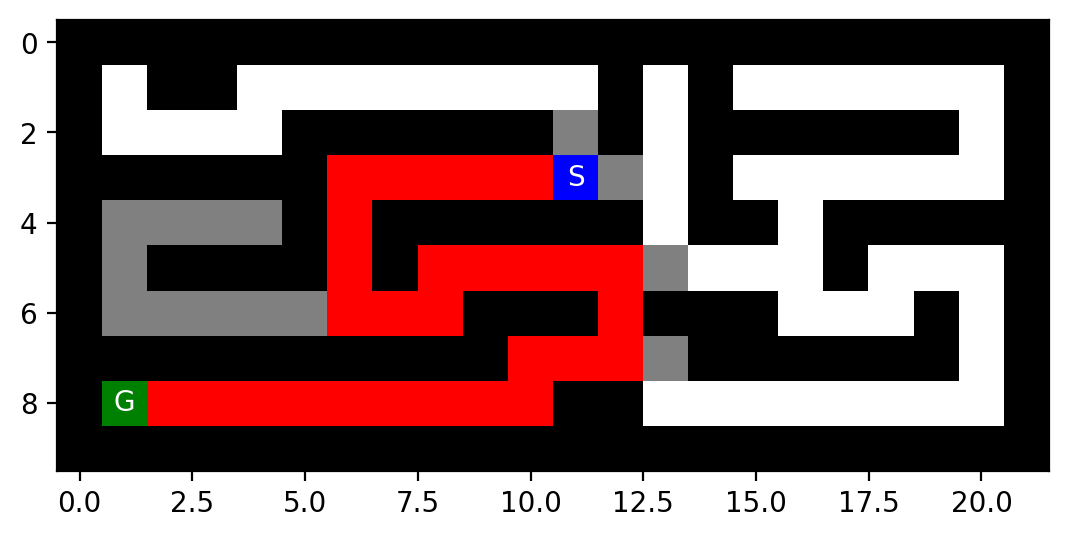

path_cost: 29 num_nodes_expanded: 56 max_tree_depth: 28 max_nodes_in_memory: 54 max_frontier_size: 58 

Node - pos = (16, 1); action = WEST; cost = 76


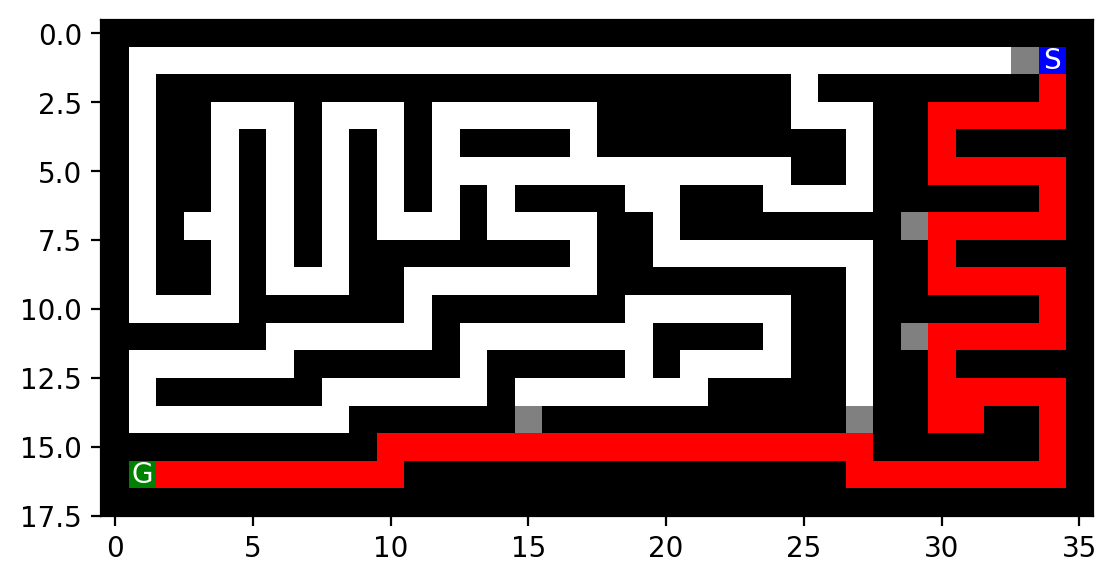

path_cost: 76 num_nodes_expanded: 153 max_tree_depth: 75 max_nodes_in_memory: 151 max_frontier_size: 155 

Node - pos = (35, 1); action = SOUTH; cost = 210


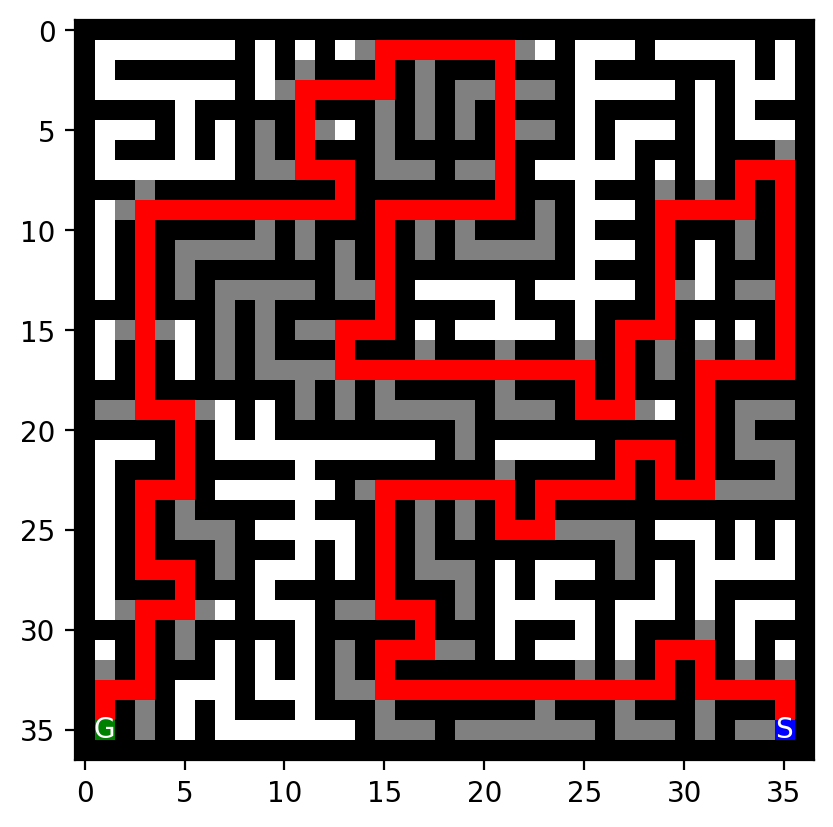

path_cost: 210 num_nodes_expanded: 332 max_tree_depth: 209 max_nodes_in_memory: 329 max_frontier_size: 333 

Path_End: Node - pos = (2, 9); action = EAST; cost = 88


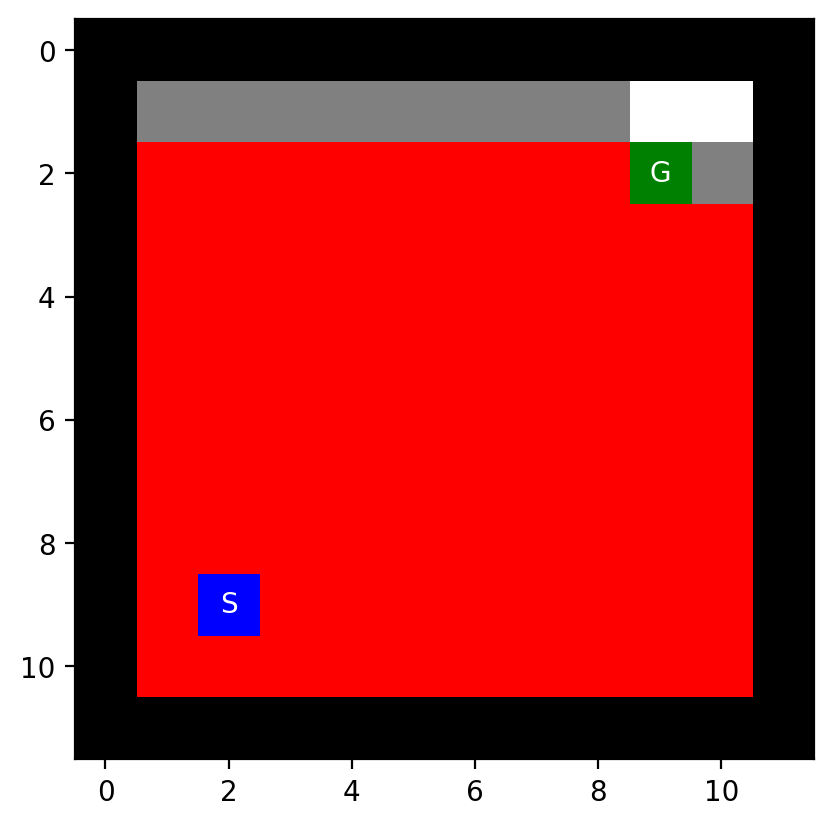

path_cost: 88 num_nodes_expanded: 118 max_tree_depth: 87 max_nodes_in_memory: 117 max_frontier_size: 121 

Path_End: Node - pos = (9, 2); action = EAST; cost = 18


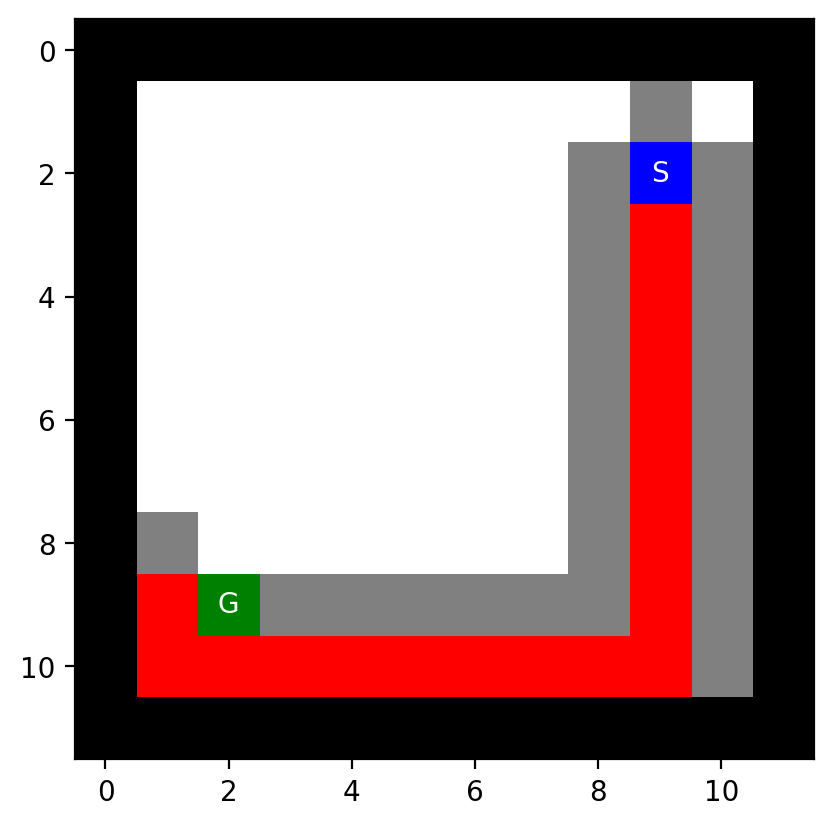

path_cost: 18 num_nodes_expanded: 41 max_tree_depth: 17 max_nodes_in_memory: 40 max_frontier_size: 44 

Path_End: Node - pos = (21, 1); action = WEST; cost = 146


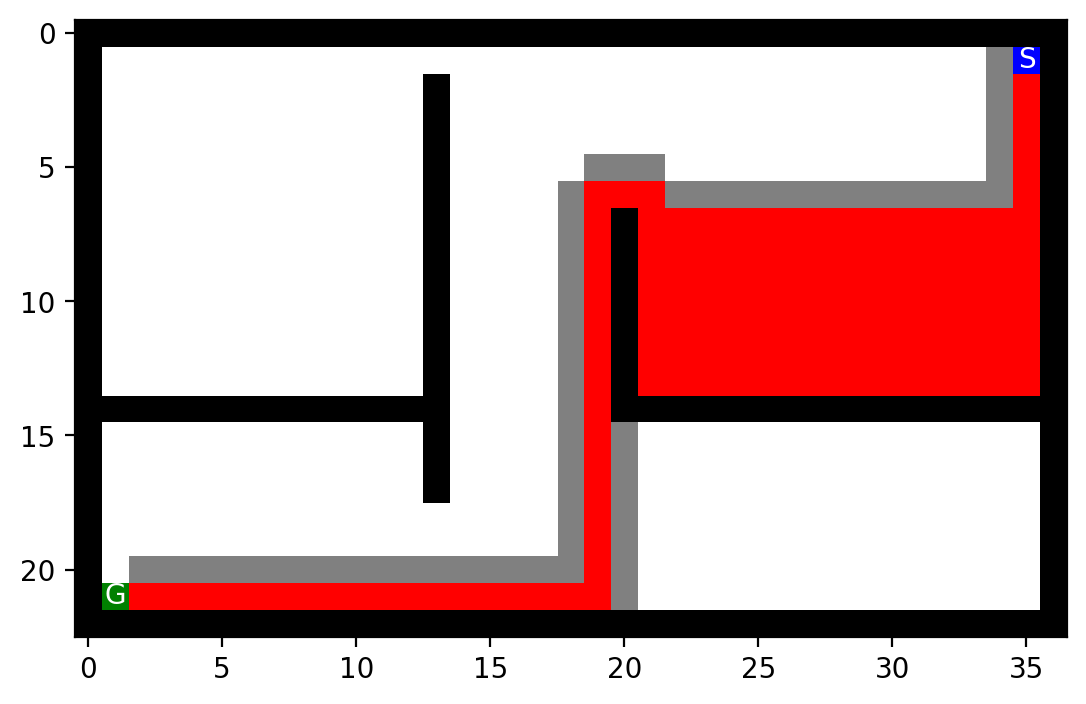

path_cost: 146 num_nodes_expanded: 266 max_tree_depth: 145 max_nodes_in_memory: 264 max_frontier_size: 268 

Path_End: Node - pos = (1, 1); action = NORTH; cost = 27


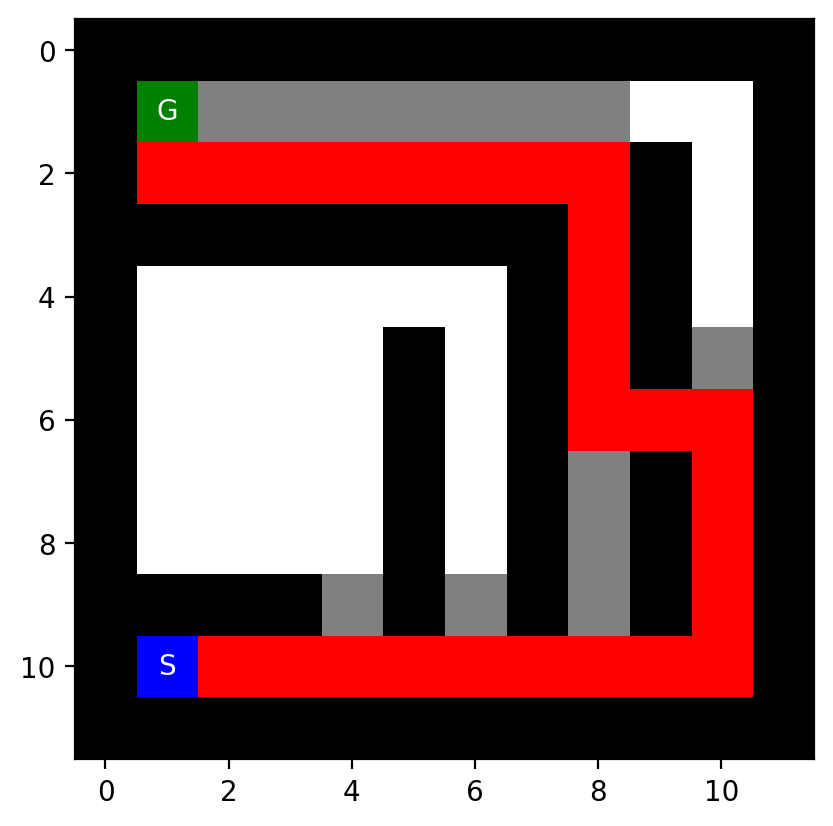

path_cost: 27 num_nodes_expanded: 27 max_tree_depth: 26 max_nodes_in_memory: 27 max_frontier_size: 31 

Path_End: Node - pos = (2, 9); action = EAST; cost = 72


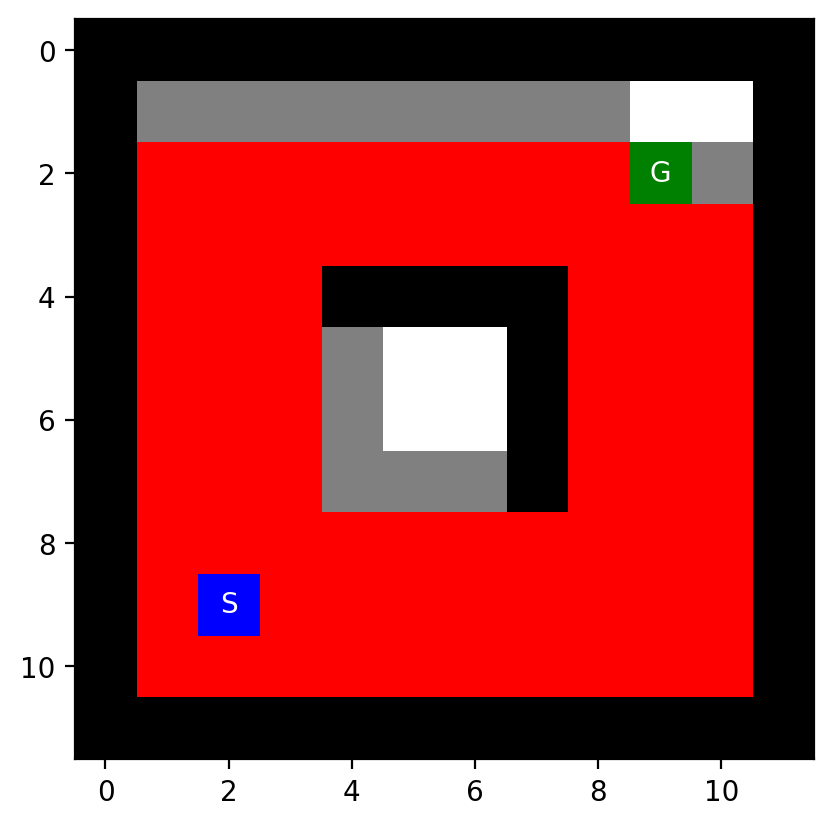

path_cost: 72 num_nodes_expanded: 94 max_tree_depth: 71 max_nodes_in_memory: 93 max_frontier_size: 97 



In [30]:
# tests IDS on all mazes
test_mazes(IDS, 100, None)

In [31]:
import pandas as pd

all_tables = []

for maze in multiple_goals_mazes:
    my_maze = copy.deepcopy(maze)

    df = pd.DataFrame(columns = ["algorithm", "path_cost", "num_nodes_expanded", "max_tree_depth", "max_nodes_in_memory", "max_frontier_size"])

    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = BFS(my_maze)
    df.loc[len(df.index)] = ["BFS", path_cost, num_nodes_expanded,  max_tree_depth, max_nodes_in_memory, max_frontier_size]
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS(my_maze, 10000000)
    df.loc[len(df.index)] = ["DFS", path_cost, num_nodes_expanded,  max_tree_depth, max_nodes_in_memory, max_frontier_size]
    Path_End, reached, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = IDS(my_maze, 10000000)
    df.loc[len(df.index)] = ["IDS", path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size]

    all_tables.append(df)

for table in all_tables:
    display(table)


,algorithm,path_cost,num_nodes_expanded,max_tree_depth,max_nodes_in_memory,max_frontier_size
0,BFS,68,270,67,270,8
1,DFS,76,153,75,151,155
2,IDS,76,153,75,151,155


,algorithm,path_cost,num_nodes_expanded,max_tree_depth,max_nodes_in_memory,max_frontier_size
0,BFS,68,270,67,270,8
1,DFS,76,153,75,151,155
2,IDS,76,153,75,151,155


,algorithm,path_cost,num_nodes_expanded,max_tree_depth,max_nodes_in_memory,max_frontier_size
0,BFS,68,270,67,270,8
1,DFS,76,153,75,151,155
2,IDS,76,153,75,151,155


## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [32]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [33]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [34]:
# Your code/answer goes here